In [1]:
!pip install --upgrade pip

  Using cached pip-22.3.1-py3-none-any.whl (2.1 MB)


ERROR: To modify pip, please run the following command:
C:\Users\MaameBaidoo\anaconda3\python.exe -m pip install --upgrade pip

[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
!pip install tensorflow


[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
#Importing libraries
import pandas as pd
import numpy as np
import glob
import os

import matplotlib.pyplot as plt
import seaborn as sns

#Sklearn Libraries
from sklearn.model_selection import train_test_split

#Tensorflow Libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input, TextVectorization, Lambda

pd.set_option('display.max_columns', None)

In [4]:
data = pd.read_csv("sensory data/00EABED2-271D-49D8-B599-1D4A09240601.features_labels.csv.gz")

In [5]:
data.head()

timestamp  raw_acc:magnitude_stats:mean  raw_acc:magnitude_stats:std  \
0  1444079161                      0.996815                     0.003529   
1  1444079221                      0.996864                     0.004172   
2  1444079281                      0.996825                     0.003667   
3  1444079341                      0.996874                     0.003541   
4  1444079431                      0.997371                     0.037653   

   raw_acc:magnitude_stats:moment3  raw_acc:magnitude_stats:moment4  \
0                        -0.002786                         0.006496   
1                        -0.003110                         0.007050   
2                         0.003094                         0.006076   
3                         0.000626                         0.006059   
4                         0.043389                         0.102332   

   raw_acc:magnitude_stats:percentile25  raw_acc:magnitude_stats:percentile50  \
0                              0.995203                              0.996825   
1                              0.994957                              0.996981   
2                              0.994797                              0.996614   
3                              0.995050                              0.996907   
4                              0.995548                              0.996860   

   raw_acc:magnitude_stats:percentile75  \
0                              0.998502   
1                              0.998766   
2                              0.998704   
3                              0.998690   
4                              0.998205   

   raw_acc:magnitude_stats:value_entropy  \
0                               1.748756   
1                               1.935573   
2                               2.031780   
3                               1.865318   
4                               0.460806   

   raw_acc:magnitude_stats:time_entropy  \
0                              6.684605   
1                              6.684603   
2                              6.684605   
3                              6.684605   
4                              6.683904   

   raw_acc:magnitude_spectrum:log_energy_band0  \
0                                     5.043970   
1                                     5.043367   
2                                     5.043599   
3                                     5.043263   
4                                     5.042779   

   raw_acc:magnitude_spectrum:log_energy_band1  \
0                                     0.000042   
1                                     0.000071   
2                                     0.000052   
3                                     0.000019   
4                                     0.000858   

   raw_acc:magnitude_spectrum:log_energy_band2  \
0                                     0.000364   
1                                     0.000468   
2                                     0.000251   
3                                     0.000173   
4                                     0.006035   

   raw_acc:magnitude_spectrum:log_energy_band3  \
0                                     0.000761   
1                                     0.000630   
2                                     0.000730   
3                                     0.000623   
4                                     0.014974   

   raw_acc:magnitude_spectrum:log_energy_band4  \
0                                     0.005429   
1                                     0.007756   
2                                     0.008223   
3                                     0.003763   
4                                     0.023291   

   raw_acc:magnitude_spectrum:spectral_entropy  \
0                                     0.429853   
1                                     0.429733   
2                                     0.429799   
3                                     0.429628   
4                                     0.430164   

   raw_acc:magnitude_autocorrelation:period 

In [6]:
print(data.columns)
print(len(data.columns))
# Column 1: timestamp
# Columns 2 to 226: features
# Columns 227 to 277: ground truth labels
# Column 278: label_source
# 10 sensors and 26/27 features for first sensor

Index(['timestamp', 'raw_acc:magnitude_stats:mean',
       'raw_acc:magnitude_stats:std', 'raw_acc:magnitude_stats:moment3',
       'raw_acc:magnitude_stats:moment4',
       'raw_acc:magnitude_stats:percentile25',
       'raw_acc:magnitude_stats:percentile50',
       'raw_acc:magnitude_stats:percentile75',
       'raw_acc:magnitude_stats:value_entropy',
       'raw_acc:magnitude_stats:time_entropy',
       ...
       'label:STAIRS_-_GOING_DOWN', 'label:ELEVATOR', 'label:OR_standing',
       'label:AT_SCHOOL', 'label:PHONE_IN_HAND', 'label:PHONE_IN_BAG',
       'label:PHONE_ON_TABLE', 'label:WITH_CO-WORKERS', 'label:WITH_FRIENDS',
       'label_source'],
      dtype='object', length=278)
278


In [7]:
len(data)

2287

In [8]:
# Read all 60 users' files with a new first column that has the user's UUID and concat them

files = glob.glob("sensory data\*.csv.gz")
uuids = []
for filename in files:
    uuids.append(filename.strip("sensory data\\").strip(".features_labels.csv.gz"))
ids = list(range(1, 61))
# print(ids)
# print(files)
# print(uuids)
# print(len(files))
dfs = []
for i in range(len(files)):
    df = pd.read_csv(files[i])
    new_col = [uuids[i]] * len(df)
    new_id_col = [ids[i]] * len(df) 
    df.insert(loc=0, column="uuid", value=new_col)
    df.insert(loc=1, column="id", value=new_id_col)
    dfs.append(df)

sensor_data = pd.concat(dfs,ignore_index=True)
sensor_data

uuid  id   timestamp  \
0       00EABED2-271D-49D8-B599-1D4A09240601   1  1444079161   
1       00EABED2-271D-49D8-B599-1D4A09240601   1  1444079221   
2       00EABED2-271D-49D8-B599-1D4A09240601   1  1444079281   
3       00EABED2-271D-49D8-B599-1D4A09240601   1  1444079341   
4       00EABED2-271D-49D8-B599-1D4A09240601   1  1444079431   
...                                      ...  ..         ...   
377341  FDAA70A1-42A3-4E3F-9AE3-3FDA412E03BF  60  1444234779   
377342  FDAA70A1-42A3-4E3F-9AE3-3FDA412E03BF  60  1444234839   
377343  FDAA70A1-42A3-4E3F-9AE3-3FDA412E03BF  60  1444234899   
377344  FDAA70A1-42A3-4E3F-9AE3-3FDA412E03BF  60  1444234959   
377345  FDAA70A1-42A3-4E3F-9AE3-3FDA412E03BF  60  1444235019   

        raw_acc:magnitude_stats:mean  raw_acc:magnitude_stats:std  \
0                           0.996815                     0.003529   
1                           0.996864                     0.004172   
2                           0.996825                     0.003667   
3                           0.996874                     0.003541   
4                           0.997371                     0.037653   
...                              ...                          ...   
377341                      1.007886                     0.009355   
377342                      1.000400                     0.009068   
377343                      1.026223                     0.195112   
377344                      1.123513                     0.273450   
377345                      1.020624                     0.135672   

        raw_acc:magnitude_stats:moment3  raw_acc:magnitude_stats:moment4  \
0                             -0.002786                         0.006496   
1                             -0.003110                         0.007050   
2                              0.003094                         0.006076   
3                              0.000626                         0.006059   
4                              0.043389                         0.102332   
...                                 ...                              ...   
377341                         0.012618                         0.030905   
377342                        -0.019631                         0.032762   
377343                         0.255240                         0.379733   
377344                         0.312818                         0.480787   
377345                         0.104091                         0.185868   

        raw_acc:magnitude_stats:percentile25  \
0                                   0.995203   
1                                   0.994957   
2                                   0.994797   
3                                   0.995050   
4                                   0.995548   
...                                      ...   
377341                              1.005121   
377342                              0.998186   
377343                              0.983684   
377344                              0.966631   
377345                              0.915936   

        raw_acc:magnitude_stats:percentile50  \
0                                   0.996825   
1                                   0.996981   
2                                   0.996614   
3                                   0.996907   
4                                   0.996860   
...                                      ...   
377341                              1.008012   
377342                              1.001128   
377343                              1.000173   
377344                              1.051232   
377345                              1.018161   

        raw_acc:magnitude_stats:percentile75  \
0                                   0.998502   
1                                   0.998766   
2                                   0.998704   
3                                   0.998690   
4                                   0.998205   
...                                      ...   
377341                              1.0

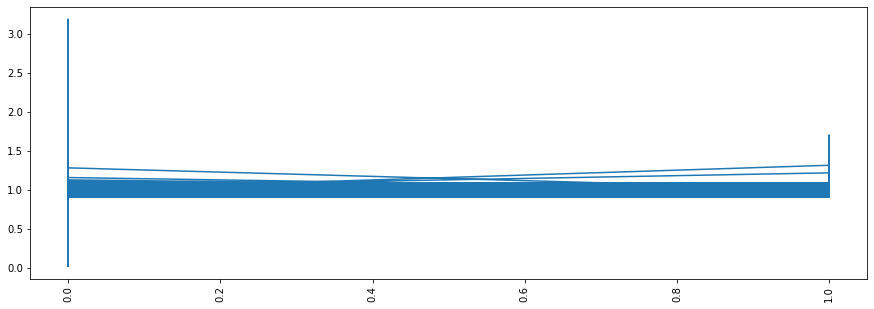

In [9]:
#How accelerometer recordings change throught discrete time of day
plt.figure(figsize = (15, 5))
plt.plot(sensor_data["discrete:time_of_day:between0and6"], sensor_data["raw_acc:magnitude_stats:mean"])
plt.xticks(rotation = 90)
plt.show()

# Features

In [10]:
#Extracting features and timestamp

features = sensor_data.iloc[:, 0:228]
print(features.columns[3:29])

Index(['raw_acc:magnitude_stats:mean', 'raw_acc:magnitude_stats:std',
       'raw_acc:magnitude_stats:moment3', 'raw_acc:magnitude_stats:moment4',
       'raw_acc:magnitude_stats:percentile25',
       'raw_acc:magnitude_stats:percentile50',
       'raw_acc:magnitude_stats:percentile75',
       'raw_acc:magnitude_stats:value_entropy',
       'raw_acc:magnitude_stats:time_entropy',
       'raw_acc:magnitude_spectrum:log_energy_band0',
       'raw_acc:magnitude_spectrum:log_energy_band1',
       'raw_acc:magnitude_spectrum:log_energy_band2',
       'raw_acc:magnitude_spectrum:log_energy_band3',
       'raw_acc:magnitude_spectrum:log_energy_band4',
       'raw_acc:magnitude_spectrum:spectral_entropy',
       'raw_acc:magnitude_autocorrelation:period',
       'raw_acc:magnitude_autocorrelation:normalized_ac', 'raw_acc:3d:mean_x',
       'raw_acc:3d:mean_y', 'raw_acc:3d:mean_z', 'raw_acc:3d:std_x',
       'raw_acc:3d:std_y', 'raw_acc:3d:std_z', 'raw_acc:3d:ro_xy',
       'raw_acc:3d:ro_xz', 

In [11]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 377346 entries, 0 to 377345
Columns: 228 entries, uuid to discrete:time_of_day:between21and3
dtypes: float64(225), int64(2), object(1)
memory usage: 656.4+ MB


In [12]:
features.describe()

id     timestamp  raw_acc:magnitude_stats:mean  \
count  377346.000000  3.773460e+05                 377056.000000   
mean       30.494096  1.445839e+09                      1.002223   
std        15.996513  5.907009e+06                      0.079623   
min         1.000000  1.433537e+09                      0.018148   
25%        17.000000  1.441438e+09                      0.992556   
50%        31.000000  1.444974e+09                      1.001258   
75%        44.000000  1.448696e+09                      1.012745   
max        60.000000  1.464899e+09                      3.185837   

       raw_acc:magnitude_stats:std  raw_acc:magnitude_stats:moment3  \
count                377056.000000                    377056.000000   
mean                      0.038832                         0.037772   
std                       0.096109                         0.113198   
min                       0.000030                        -0.493806   
25%                       0.001709                        -0.000785   
50%                       0.003265                         0.000772   
75%                       0.021366                         0.009864   
max                       1.936343                         2.472750   

       raw_acc:magnitude_stats:moment4  raw_acc:magnitude_stats:percentile25  \
count                    377056.000000                         377056.000000   
mean                          0.072804                              0.983165   
std                           0.170481                              0.082960   
min                           0.000039                              0.015845   
25%                           0.002328                              0.982671   
50%                           0.005051                              0.995300   
75%                           0.045333                              1.003679   
max                           3.360718                              1.942718   

       raw_acc:magnitude_stats:percentile50  \
count                         377056.000000   
mean                               0.998471   
std                                0.076687   
min                                0.017998   
25%                                0.991248   
50%                                1.000116   
75%                                1.009232   
max                                2.636697   

       raw_acc:magnitude_stats:percentile75  \
count                         377056.000000   
mean                               1.016691   
std                                0.104874   
min                                0.020365   
25%                                0.994859   
50%                                1.003813   
75%                                1.019163   
max                                3.958338   

       raw_acc:magnitude_stats:value_entropy  \
count                          377056.000000   
mean                                2.045331   
std                                 0.616899   
min                                 0.009605   
25%                                 1.671571   
50%                                 2.296398   
75%                                 2.523618   
max                                 2.971272   

       raw_acc:magnitude_stats:time_entropy  \
count                         377056.000000   
mean                               6.680278   
std                                0.021246   
min                                5.460637   
25%                                6.684369   
50%                                6.684606   
75%                                6.684610   
max                                6.684612   

       raw_acc:magnitude_spectrum:log_energy_band0  \
count                                377056.000000   
mean                                      5.039597   
std                                       0.025809   
min                                       4.338109   
25%                                       5.042891   
50%            

In [13]:
#Taking it sensor by sensor

## Accelerometer

In [14]:
#Extracting the mean calculations every 60 secs for each sensor
raw_acc_cols = ["uuid", "id", "timestamp"]
for col in sensor_data.columns:
    if col.startswith("raw_acc"):
        raw_acc_cols.append(col)
raw_acc_cols

['uuid',
 'id',
 'timestamp',
 'raw_acc:magnitude_stats:mean',
 'raw_acc:magnitude_stats:std',
 'raw_acc:magnitude_stats:moment3',
 'raw_acc:magnitude_stats:moment4',
 'raw_acc:magnitude_stats:percentile25',
 'raw_acc:magnitude_stats:percentile50',
 'raw_acc:magnitude_stats:percentile75',
 'raw_acc:magnitude_stats:value_entropy',
 'raw_acc:magnitude_stats:time_entropy',
 'raw_acc:magnitude_spectrum:log_energy_band0',
 'raw_acc:magnitude_spectrum:log_energy_band1',
 'raw_acc:magnitude_spectrum:log_energy_band2',
 'raw_acc:magnitude_spectrum:log_energy_band3',
 'raw_acc:magnitude_spectrum:log_energy_band4',
 'raw_acc:magnitude_spectrum:spectral_entropy',
 'raw_acc:magnitude_autocorrelation:period',
 'raw_acc:magnitude_autocorrelation:normalized_ac',
 'raw_acc:3d:mean_x',
 'raw_acc:3d:mean_y',
 'raw_acc:3d:mean_z',
 'raw_acc:3d:std_x',
 'raw_acc:3d:std_y',
 'raw_acc:3d:std_z',
 'raw_acc:3d:ro_xy',
 'raw_acc:3d:ro_xz',
 'raw_acc:3d:ro_yz']

In [15]:
raw_acc = sensor_data[raw_acc_cols]
raw_acc

uuid  id   timestamp  \
0       00EABED2-271D-49D8-B599-1D4A09240601   1  1444079161   
1       00EABED2-271D-49D8-B599-1D4A09240601   1  1444079221   
2       00EABED2-271D-49D8-B599-1D4A09240601   1  1444079281   
3       00EABED2-271D-49D8-B599-1D4A09240601   1  1444079341   
4       00EABED2-271D-49D8-B599-1D4A09240601   1  1444079431   
...                                      ...  ..         ...   
377341  FDAA70A1-42A3-4E3F-9AE3-3FDA412E03BF  60  1444234779   
377342  FDAA70A1-42A3-4E3F-9AE3-3FDA412E03BF  60  1444234839   
377343  FDAA70A1-42A3-4E3F-9AE3-3FDA412E03BF  60  1444234899   
377344  FDAA70A1-42A3-4E3F-9AE3-3FDA412E03BF  60  1444234959   
377345  FDAA70A1-42A3-4E3F-9AE3-3FDA412E03BF  60  1444235019   

        raw_acc:magnitude_stats:mean  raw_acc:magnitude_stats:std  \
0                           0.996815                     0.003529   
1                           0.996864                     0.004172   
2                           0.996825                     0.003667   
3                           0.996874                     0.003541   
4                           0.997371                     0.037653   
...                              ...                          ...   
377341                      1.007886                     0.009355   
377342                      1.000400                     0.009068   
377343                      1.026223                     0.195112   
377344                      1.123513                     0.273450   
377345                      1.020624                     0.135672   

        raw_acc:magnitude_stats:moment3  raw_acc:magnitude_stats:moment4  \
0                             -0.002786                         0.006496   
1                             -0.003110                         0.007050   
2                              0.003094                         0.006076   
3                              0.000626                         0.006059   
4                              0.043389                         0.102332   
...                                 ...                              ...   
377341                         0.012618                         0.030905   
377342                        -0.019631                         0.032762   
377343                         0.255240                         0.379733   
377344                         0.312818                         0.480787   
377345                         0.104091                         0.185868   

        raw_acc:magnitude_stats:percentile25  \
0                                   0.995203   
1                                   0.994957   
2                                   0.994797   
3                                   0.995050   
4                                   0.995548   
...                                      ...   
377341                              1.005121   
377342                              0.998186   
377343                              0.983684   
377344                              0.966631   
377345                              0.915936   

        raw_acc:magnitude_stats:percentile50  \
0                                   0.996825   
1                                   0.996981   
2                                   0.996614   
3                                   0.996907   
4                                   0.996860   
...                                      ...   
377341                              1.008012   
377342                              1.001128   
377343                              1.000173   
377344                              1.051232   
377345                              1.018161   

        raw_acc:magnitude_stats:percentile75  \
0                                   0.998502   
1                                   0.998766   
2                                   0.998704   
3                                   0.998690   
4                                   0.998205   
...                                      ...   
377341                              1.0

In [16]:
raw_acc["raw_acc:magnitude_stats:mean"].describe()

count    377056.000000
mean          1.002223
std           0.079623
min           0.018148
25%           0.992556
50%           1.001258
75%           1.012745
max           3.185837
Name: raw_acc:magnitude_stats:mean, dtype: float64

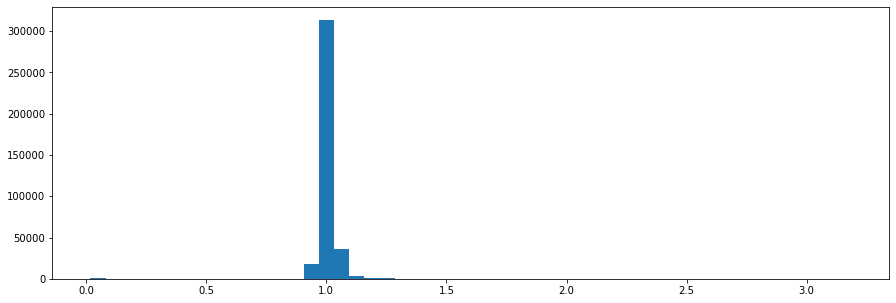

In [17]:
#Distribution of the accelerometer mean (in every 60 secs) values
plt.figure(figsize = (15, 5))
plt.hist(raw_acc["raw_acc:magnitude_stats:mean"], bins = 50) #Most values are around 1.0
plt.show()

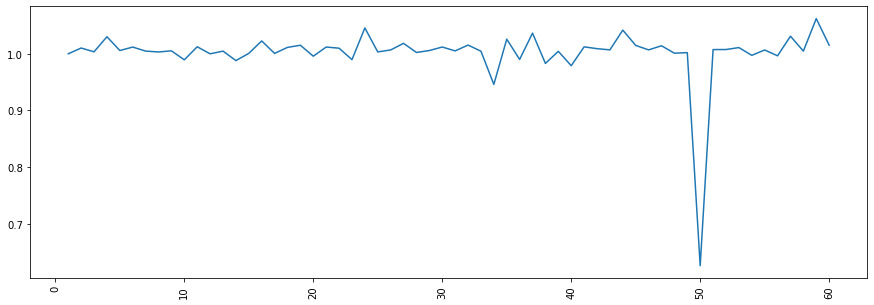

In [18]:
#Distribution based on user
raw_acc_by_user = raw_acc.groupby("id", as_index=False).mean()
plt.figure(figsize = (15, 5))
plt.plot(raw_acc_by_user["id"], raw_acc_by_user["raw_acc:magnitude_stats:mean"])
plt.xticks(rotation = 90)
plt.show()

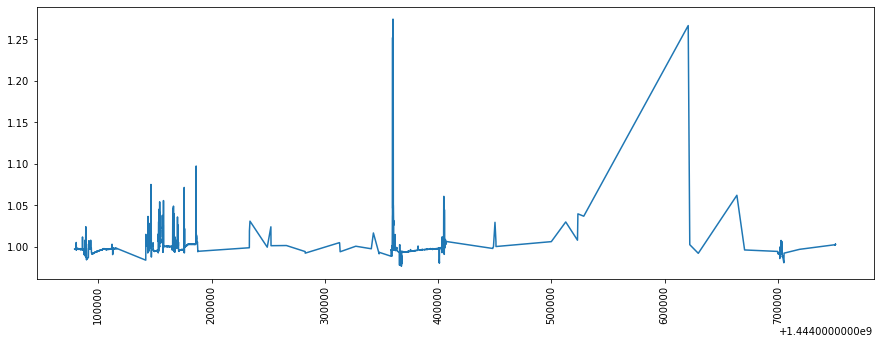

In [19]:
#Distribution over time for first user
raw_acc_user_2 = raw_acc[raw_acc["id"] == 1]
plt.figure(figsize = (15, 5))
plt.plot(raw_acc_user_2["timestamp"], raw_acc_user_2["raw_acc:magnitude_stats:mean"])
plt.xticks(rotation = 90)
plt.show()

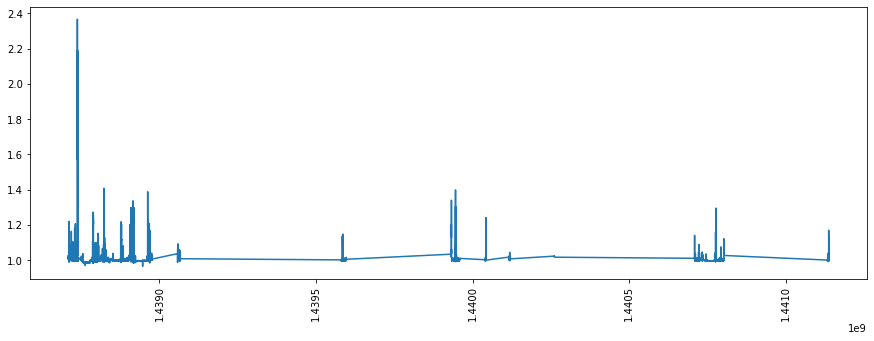

In [20]:
#Distribution over time for second user
raw_acc_user_1 = raw_acc[raw_acc["id"] == 2]
plt.figure(figsize = (15, 5))
plt.plot(raw_acc_user_1["timestamp"], raw_acc_user_1["raw_acc:magnitude_stats:mean"])
plt.xticks(rotation = 90)
plt.show()

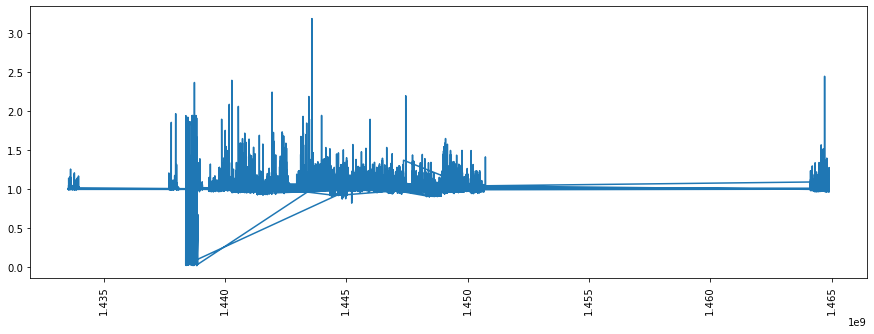

In [21]:
#Distribution over time for all users 
#does not make sense, since different time values for each user
plt.figure(figsize = (15, 5))
plt.plot(raw_acc["timestamp"], raw_acc["raw_acc:magnitude_stats:mean"])
plt.xticks(rotation = 90)
plt.show()

## Gyroscope

In [22]:
#Extracting the mean calculations every 60 secs for each sensor
proc_gyro_cols = ["uuid", "id", "timestamp"]
for col in sensor_data.columns:
    if col.startswith("proc_gyro"):
        proc_gyro_cols.append(col)
proc_gyro_cols

['uuid',
 'id',
 'timestamp',
 'proc_gyro:magnitude_stats:mean',
 'proc_gyro:magnitude_stats:std',
 'proc_gyro:magnitude_stats:moment3',
 'proc_gyro:magnitude_stats:moment4',
 'proc_gyro:magnitude_stats:percentile25',
 'proc_gyro:magnitude_stats:percentile50',
 'proc_gyro:magnitude_stats:percentile75',
 'proc_gyro:magnitude_stats:value_entropy',
 'proc_gyro:magnitude_stats:time_entropy',
 'proc_gyro:magnitude_spectrum:log_energy_band0',
 'proc_gyro:magnitude_spectrum:log_energy_band1',
 'proc_gyro:magnitude_spectrum:log_energy_band2',
 'proc_gyro:magnitude_spectrum:log_energy_band3',
 'proc_gyro:magnitude_spectrum:log_energy_band4',
 'proc_gyro:magnitude_spectrum:spectral_entropy',
 'proc_gyro:magnitude_autocorrelation:period',
 'proc_gyro:magnitude_autocorrelation:normalized_ac',
 'proc_gyro:3d:mean_x',
 'proc_gyro:3d:mean_y',
 'proc_gyro:3d:mean_z',
 'proc_gyro:3d:std_x',
 'proc_gyro:3d:std_y',
 'proc_gyro:3d:std_z',
 'proc_gyro:3d:ro_xy',
 'proc_gyro:3d:ro_xz',
 'proc_gyro:3d:ro_yz'

In [23]:
proc_gyro = sensor_data[proc_gyro_cols]
proc_gyro

uuid  id   timestamp  \
0       00EABED2-271D-49D8-B599-1D4A09240601   1  1444079161   
1       00EABED2-271D-49D8-B599-1D4A09240601   1  1444079221   
2       00EABED2-271D-49D8-B599-1D4A09240601   1  1444079281   
3       00EABED2-271D-49D8-B599-1D4A09240601   1  1444079341   
4       00EABED2-271D-49D8-B599-1D4A09240601   1  1444079431   
...                                      ...  ..         ...   
377341  FDAA70A1-42A3-4E3F-9AE3-3FDA412E03BF  60  1444234779   
377342  FDAA70A1-42A3-4E3F-9AE3-3FDA412E03BF  60  1444234839   
377343  FDAA70A1-42A3-4E3F-9AE3-3FDA412E03BF  60  1444234899   
377344  FDAA70A1-42A3-4E3F-9AE3-3FDA412E03BF  60  1444234959   
377345  FDAA70A1-42A3-4E3F-9AE3-3FDA412E03BF  60  1444235019   

        proc_gyro:magnitude_stats:mean  proc_gyro:magnitude_stats:std  \
0                             0.002558                       0.001510   
1                             0.002279                       0.001256   
2                             0.002579                       0.001790   
3                             0.002497                       0.001577   
4                             0.105566                       0.340573   
...                                ...                            ...   
377341                        0.020239                       0.131169   
377342                        0.007604                       0.005517   
377343                        1.012825                       1.446485   
377344                        2.140000                       1.581337   
377345                        0.580213                       0.346909   

        proc_gyro:magnitude_stats:moment3  proc_gyro:magnitude_stats:moment4  \
0                                0.001832                           0.002531   
1                                0.001519                           0.002183   
2                                0.002418                           0.003395   
3                                0.001944                           0.002715   
4                                0.582097                           0.825209   
...                                   ...                                ...   
377341                           0.297011                           0.458977   
377342                           0.010335                           0.016889   
377343                           1.951552                           2.592079   
377344                           1.958200                           2.738973   
377345                           0.445245                           0.605668   

        proc_gyro:magnitude_stats:percentile25  \
0                                     0.001526   
1                                     0.001424   
2                                     0.001350   
3                                     0.001415   
4                                     0.001867   
...                                        ...   
377341                                0.003924   
377342                                0.004601   
377343                                0.118451   
377344                                0.963640   
377345                                0.366251   

        proc_gyro:magnitude_stats:percentile50  \
0                                     0.002196   
1                                     0.002035   
2                                     0.002088   
3                                     0.002106   
4                                     0.003018   
...                                        ...   
377341                                0.005372   
377342                                0.006533   
377343                                0.422182   
377344                                1.717493   
377345                                0.504070   

        proc_gyro:magnitude_stats:percentile75  \
0                                     0.003230   
1                                     0.002880   
2                                     0.003187   
3                              

In [24]:
proc_gyro["proc_gyro:magnitude_stats:mean"].describe()

count    359912.000000
mean          0.174108
std           0.477457
min           0.000705
25%           0.002914
50%           0.008987
75%           0.103023
max          34.906977
Name: proc_gyro:magnitude_stats:mean, dtype: float64

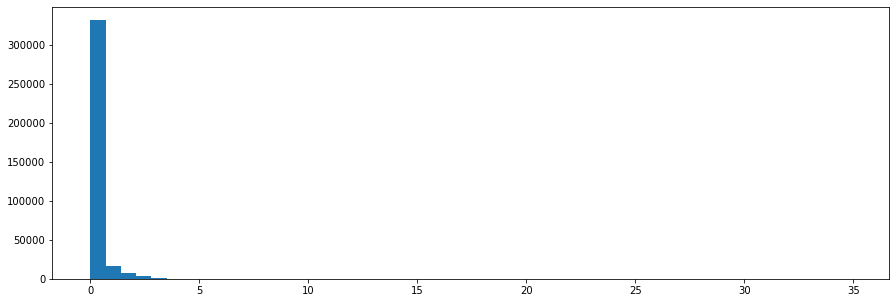

In [25]:
#Distribution of the gyroscope mean (in every 60 secs) values
plt.figure(figsize = (15, 5))
plt.hist(proc_gyro["proc_gyro:magnitude_stats:mean"], bins = 50) #Most values are around 0.1
plt.show()

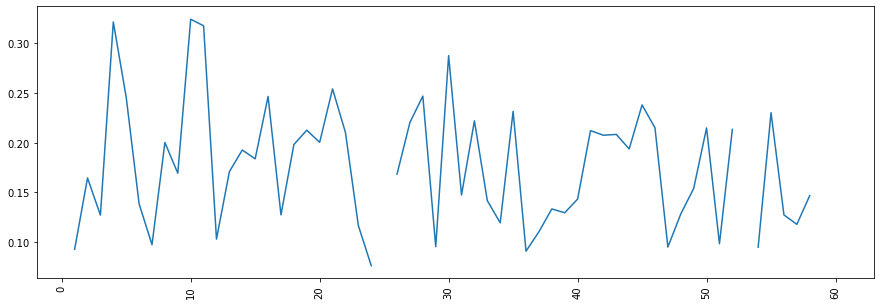

In [26]:
#Distribution based on user
proc_gyro_by_user = proc_gyro.groupby("id", as_index=False).mean()
plt.figure(figsize = (15, 5))
plt.plot(proc_gyro_by_user["id"], proc_gyro_by_user["proc_gyro:magnitude_stats:mean"])
plt.xticks(rotation = 90)
plt.show()

In [27]:
#Do for rest of the features

# Labels

In [28]:
#Extracting features and timestamp

id_time_cols = sensor_data.iloc[:, 0:3]
l = sensor_data.iloc[:, 228:279]
labels = pd.concat([id_time_cols, l], axis = 1)
# print(features.columns[3:29])
labels

uuid  id   timestamp  \
0       00EABED2-271D-49D8-B599-1D4A09240601   1  1444079161   
1       00EABED2-271D-49D8-B599-1D4A09240601   1  1444079221   
2       00EABED2-271D-49D8-B599-1D4A09240601   1  1444079281   
3       00EABED2-271D-49D8-B599-1D4A09240601   1  1444079341   
4       00EABED2-271D-49D8-B599-1D4A09240601   1  1444079431   
...                                      ...  ..         ...   
377341  FDAA70A1-42A3-4E3F-9AE3-3FDA412E03BF  60  1444234779   
377342  FDAA70A1-42A3-4E3F-9AE3-3FDA412E03BF  60  1444234839   
377343  FDAA70A1-42A3-4E3F-9AE3-3FDA412E03BF  60  1444234899   
377344  FDAA70A1-42A3-4E3F-9AE3-3FDA412E03BF  60  1444234959   
377345  FDAA70A1-42A3-4E3F-9AE3-3FDA412E03BF  60  1444235019   

        label:LYING_DOWN  label:SITTING  label:FIX_walking  label:FIX_running  \
0                    0.0            1.0                0.0                NaN   
1                    0.0            1.0                0.0                NaN   
2                    0.0            1.0                0.0                NaN   
3                    0.0            1.0                0.0                NaN   
4                    0.0            1.0                0.0                NaN   
...                  ...            ...                ...                ...   
377341               NaN            NaN                NaN                NaN   
377342               NaN            NaN                NaN                NaN   
377343               NaN            NaN                NaN                NaN   
377344               NaN            NaN                NaN                NaN   
377345               NaN            NaN                NaN                NaN   

        label:BICYCLING  label:SLEEPING  label:LAB_WORK  label:IN_CLASS  \
0                   NaN             0.0             NaN             0.0   
1                   NaN             0.0             NaN             0.0   
2                   NaN             0.0             NaN             0.0   
3                   NaN             0.0             NaN             0.0   
4                   NaN             0.0             NaN             0.0   
...                 ...             ...             ...             ...   
377341              NaN             NaN             NaN             NaN   
377342              NaN             NaN             NaN             NaN   
377343              NaN             NaN             NaN             NaN   
377344              NaN             NaN             NaN             NaN   
377345              NaN             NaN             NaN             NaN   

        label:IN_A_MEETING  label:LOC_main_workplace  label:OR_indoors  \
0                      1.0                       1.0               NaN   
1                      1.0                       1.0               NaN   
2                      1.0                       1.0               NaN   
3                      1.0                       1.0               NaN   
4                      1.0                       1.0               NaN   
...                    ...                       ...               ...   
377341                 NaN                       NaN               NaN   
377342                 NaN                       NaN               NaN   
377343                 NaN                       NaN               NaN   
377344                 NaN                       NaN               NaN   
377345                 NaN                       NaN               NaN   

        label:OR_outside  label:IN_A_CAR  label:ON_A_BUS  \
0                    NaN             NaN             0.0   
1                    NaN             NaN             0.0   
2                    NaN             NaN             0.0   
3                    NaN             NaN             0.0   
4                    NaN             NaN             0.0   
...                  ...             ...             ...   
377341               NaN             NaN             NaN   
377342               NaN    

In [29]:
# Counting the number of 0s and 1s for each label
labels_val_counts = labels.iloc[:, 3:].apply(pd.Series.value_counts).transpose().sort_values(by = 1.0, ascending = False)
# Top 5 things users are mostly doing include label:OR_indoors, label:LOC_home, label:SITTING, label:PHONE_ON_TABLE and label:LYING_DOWN
labels_val_counts

0.0     1.0
label:OR_indoors                12114  184692
label:LOC_home                 202442  152892
label:SITTING                  170238  136356
label:PHONE_ON_TABLE            47386  115037
label:LYING_DOWN               199513  104210
label:SLEEPING                 202213   83055
label:AT_SCHOOL                216833   42331
label:COMPUTER_WORK            199478   38081
label:OR_standing              268812   37782
label:TALKING                  243253   36293
label:LOC_main_workplace       167783   33944
label:WITH_FRIENDS             140677   24737
label:PHONE_IN_POCKET          110963   23401
label:FIX_walking              284458   22136
label:SURFING_THE_INTERNET     173267   19416
label:EATING                   279887   16594
label:PHONE_IN_HAND            127130   14573
label:WATCHING_TV              183041   13311
label:OR_outside               139384   12114
label:PHONE_IN_BAG              82261   10201
label:OR_exercise              232756    8081
label:DRIVE_-_I_M_THE_DRIVER   154289    7975
label:WITH_CO-WORKERS          105840    6224
label:IN_CLASS                 102953    6110
label:IN_A_CAR                 168613    6083
label:IN_A_MEETING             226060    5153
label:BICYCLING                130163    5020
label:COOKING                  205317    4029
label:LAB_WORK                  45547    3848
label:CLEANING                 155614    3806
label:GROOMING                 195736    3064
label:TOILET                   217618    2655
label:DRIVE_-_I_M_A_PASSENGER  128561    2526
label:DRESSING                 205675    2233
label:FIX_restaurant           155484    2098
label:BATHING_-_SHOWER         199033    2087
label:SHOPPING                 136952    1841
label:ON_A_BUS                 167238    1794
label:AT_A_PARTY                53093    1470
label:DRINKING__ALCOHOL_        69327    1456
label:WASHING_DISHES           135246    1228
label:AT_THE_GYM                43242    1151
label:FIX_running              139780    1090
label:STROLLING                 52955     806
label:STAIRS_-_GOING_UP         93831     798
label:STAIRS_-_GOING_DOWN       93641     774
label:SINGING                   24466     651
label:LOC_beach                 57059     585
label:DOING_LAUNDRY             73416     556
label:AT_A_BAR                  32669     551
label:ELEVATOR                  70996     200

In [30]:
#Separating features into the 4 different types

## User Reports

In [31]:
user_labels_cols = ["uuid", "id", "timestamp"]
for col in labels.columns:
    if col.strip("label:").isupper():
        user_labels_cols.append(col)
user_labels_cols

['uuid',
 'id',
 'timestamp',
 'label:LYING_DOWN',
 'label:SITTING',
 'label:BICYCLING',
 'label:SLEEPING',
 'label:LAB_WORK',
 'label:IN_CLASS',
 'label:IN_A_MEETING',
 'label:IN_A_CAR',
 'label:ON_A_BUS',
 'label:DRIVE_-_I_M_THE_DRIVER',
 'label:DRIVE_-_I_M_A_PASSENGER',
 'label:PHONE_IN_POCKET',
 'label:COOKING',
 'label:SHOPPING',
 'label:STROLLING',
 'label:DRINKING__ALCOHOL_',
 'label:BATHING_-_SHOWER',
 'label:CLEANING',
 'label:DOING_LAUNDRY',
 'label:WASHING_DISHES',
 'label:WATCHING_TV',
 'label:SURFING_THE_INTERNET',
 'label:AT_A_PARTY',
 'label:AT_A_BAR',
 'label:SINGING',
 'label:TALKING',
 'label:COMPUTER_WORK',
 'label:EATING',
 'label:TOILET',
 'label:GROOMING',
 'label:DRESSING',
 'label:AT_THE_GYM',
 'label:STAIRS_-_GOING_UP',
 'label:STAIRS_-_GOING_DOWN',
 'label:ELEVATOR',
 'label:AT_SCHOOL',
 'label:PHONE_IN_HAND',
 'label:PHONE_IN_BAG',
 'label:PHONE_ON_TABLE',
 'label:WITH_CO-WORKERS',
 'label:WITH_FRIENDS']

In [32]:
user_labels = labels[user_labels_cols]
user_labels

uuid  id   timestamp  \
0       00EABED2-271D-49D8-B599-1D4A09240601   1  1444079161   
1       00EABED2-271D-49D8-B599-1D4A09240601   1  1444079221   
2       00EABED2-271D-49D8-B599-1D4A09240601   1  1444079281   
3       00EABED2-271D-49D8-B599-1D4A09240601   1  1444079341   
4       00EABED2-271D-49D8-B599-1D4A09240601   1  1444079431   
...                                      ...  ..         ...   
377341  FDAA70A1-42A3-4E3F-9AE3-3FDA412E03BF  60  1444234779   
377342  FDAA70A1-42A3-4E3F-9AE3-3FDA412E03BF  60  1444234839   
377343  FDAA70A1-42A3-4E3F-9AE3-3FDA412E03BF  60  1444234899   
377344  FDAA70A1-42A3-4E3F-9AE3-3FDA412E03BF  60  1444234959   
377345  FDAA70A1-42A3-4E3F-9AE3-3FDA412E03BF  60  1444235019   

        label:LYING_DOWN  label:SITTING  label:BICYCLING  label:SLEEPING  \
0                    0.0            1.0              NaN             0.0   
1                    0.0            1.0              NaN             0.0   
2                    0.0            1.0              NaN             0.0   
3                    0.0            1.0              NaN             0.0   
4                    0.0            1.0              NaN             0.0   
...                  ...            ...              ...             ...   
377341               NaN            NaN              NaN             NaN   
377342               NaN            NaN              NaN             NaN   
377343               NaN            NaN              NaN             NaN   
377344               NaN            NaN              NaN             NaN   
377345               NaN            NaN              NaN             NaN   

        label:LAB_WORK  label:IN_CLASS  label:IN_A_MEETING  label:IN_A_CAR  \
0                  NaN             0.0                 1.0             NaN   
1                  NaN             0.0                 1.0             NaN   
2                  NaN             0.0                 1.0             NaN   
3                  NaN             0.0                 1.0             NaN   
4                  NaN             0.0                 1.0             NaN   
...                ...             ...                 ...             ...   
377341             NaN             NaN                 NaN             NaN   
377342             NaN             NaN                 NaN             NaN   
377343             NaN             NaN                 NaN             NaN   
377344             NaN             NaN                 NaN             NaN   
377345             NaN             NaN                 NaN             NaN   

        label:ON_A_BUS  label:DRIVE_-_I_M_THE_DRIVER  \
0                  0.0                           NaN   
1                  0.0                           NaN   
2                  0.0                           NaN   
3                  0.0                           NaN   
4                  0.0                           NaN   
...                ...                           ...   
377341             NaN                           NaN   
377342             NaN                           NaN   
377343             NaN                           NaN   
377344             NaN                           NaN   
377345             NaN                           NaN   

        label:DRIVE_-_I_M_A_PASSENGER  label:PHONE_IN_POCKET  label:COOKING  \
0                                 NaN                    NaN            0.0   
1                                 NaN                    NaN            0.0   
2                                 NaN                    NaN            0.0   
3                                 NaN                    NaN            0.0   
4                                 NaN                    NaN            0.0   
...                               ...                    ...            ...   
377341                            NaN                    NaN            NaN   
377342                            NaN                    NaN            NaN   
377343                            NaN

In [33]:
user_labels.describe()

id     timestamp  label:LYING_DOWN  label:SITTING  \
count  377346.000000  3.773460e+05     303723.000000  306594.000000   
mean       30.494096  1.445839e+09          0.343109       0.444745   
std        15.996513  5.907009e+06          0.474748       0.496938   
min         1.000000  1.433537e+09          0.000000       0.000000   
25%        17.000000  1.441438e+09          0.000000       0.000000   
50%        31.000000  1.444974e+09          0.000000       0.000000   
75%        44.000000  1.448696e+09          1.000000       1.000000   
max        60.000000  1.464899e+09          1.000000       1.000000   

       label:BICYCLING  label:SLEEPING  label:LAB_WORK  label:IN_CLASS  \
count    135183.000000   285268.000000    49395.000000   109063.000000   
mean          0.037135        0.291147        0.077903        0.056023   
std           0.189093        0.454292        0.268021        0.229967   
min           0.000000        0.000000        0.000000        0.000000   
25%           0.000000        0.000000        0.000000        0.000000   
50%           0.000000        0.000000        0.000000        0.000000   
75%           0.000000        1.000000        0.000000        0.000000   
max           1.000000        1.000000        1.000000        1.000000   

       label:IN_A_MEETING  label:IN_A_CAR  label:ON_A_BUS  \
count       231213.000000   174696.000000   169032.000000   
mean             0.022287        0.034820        0.010613   
std              0.147615        0.183325        0.102473   
min              0.000000        0.000000        0.000000   
25%              0.000000        0.000000        0.000000   
50%              0.000000        0.000000        0.000000   
75%              0.000000        0.000000        0.000000   
max              1.000000        1.000000        1.000000   

       label:DRIVE_-_I_M_THE_DRIVER  label:DRIVE_-_I_M_A_PASSENGER  \
count                 162264.000000                  131087.000000   
mean                       0.049148                       0.019270   
std                        0.216178                       0.137472   
min                        0.000000                       0.000000   
25%                        0.000000                       0.000000   
50%                        0.000000                       0.000000   
75%                        0.000000                       0.000000   
max                        1.000000                       1.000000   

       label:PHONE_IN_POCKET  label:COOKING  label:SHOPPING  label:STROLLING  \
count          134364.000000  209346.000000   138793.000000     53761.000000   
mean                0.174161       0.019246        0.013264         0.014992   
std                 0.379249       0.137388        0.114405         0.121523   
min                 0.000000       0.000000        0.000000         0.000000   
25%                 0.000000       0.000000        0.000000         0.000000   
50%                 0.000000       0.000000        0.000000         0.000000   
75%                 0.000000       0.000000        0.000000         0.000000   
max                 1.000000       1.000000        1.000000         1.000000   

       label:DRINKING__ALCOHOL_  label:BATHING_-_SHOWER  label:CLEANING  \
count               70783.00000           201120.000000   159420.000000   
mean                    0.02057                0.010377        0.023874   
std                     0.14194                0.101337        0.152657   
min                     0.00000                0.000000        0.000000   
25%                     0.00000                0.000000        0.000000   
50%                     0.00000                0.000000        0.000000   
75%                     0.00000                0.000000        0.000000   
max                     1.00000                1.000000        1.000000   

       label:DOING_LAUNDRY  label:WASHING_DISHES  label:WATCHING_TV  \
count         73972.000000         136474.000000      196352.0

In [34]:
# Counting the number of 0s and 1s for each label
user_val_counts = user_labels.iloc[:, 3:].apply(pd.Series.value_counts).transpose().sort_values(by = 1.0, ascending = False)
# 0s more than 1s for all labels except label:PHONE_ON_TABLE
#Users mostly SITTING/PHONE_ON_TABLE/LYING_DOWN/SLEEPING
user_val_counts

0.0     1.0
label:SITTING                  170238  136356
label:PHONE_ON_TABLE            47386  115037
label:LYING_DOWN               199513  104210
label:SLEEPING                 202213   83055
label:AT_SCHOOL                216833   42331
label:COMPUTER_WORK            199478   38081
label:TALKING                  243253   36293
label:WITH_FRIENDS             140677   24737
label:PHONE_IN_POCKET          110963   23401
label:SURFING_THE_INTERNET     173267   19416
label:EATING                   279887   16594
label:PHONE_IN_HAND            127130   14573
label:WATCHING_TV              183041   13311
label:PHONE_IN_BAG              82261   10201
label:DRIVE_-_I_M_THE_DRIVER   154289    7975
label:WITH_CO-WORKERS          105840    6224
label:IN_CLASS                 102953    6110
label:IN_A_CAR                 168613    6083
label:IN_A_MEETING             226060    5153
label:BICYCLING                130163    5020
label:COOKING                  205317    4029
label:LAB_WORK                  45547    3848
label:CLEANING                 155614    3806
label:GROOMING                 195736    3064
label:TOILET                   217618    2655
label:DRIVE_-_I_M_A_PASSENGER  128561    2526
label:DRESSING                 205675    2233
label:BATHING_-_SHOWER         199033    2087
label:SHOPPING                 136952    1841
label:ON_A_BUS                 167238    1794
label:AT_A_PARTY                53093    1470
label:DRINKING__ALCOHOL_        69327    1456
label:WASHING_DISHES           135246    1228
label:AT_THE_GYM                43242    1151
label:STROLLING                 52955     806
label:STAIRS_-_GOING_UP         93831     798
label:STAIRS_-_GOING_DOWN       93641     774
label:SINGING                   24466     651
label:DOING_LAUNDRY             73416     556
label:AT_A_BAR                  32669     551
label:ELEVATOR                  70996     200

## Fixed Version

In [35]:
fixed_labels_cols = ["uuid", "id", "timestamp"]
for col in labels.columns:
    if col.strip("label:").startswith("FIX_"):
        fixed_labels_cols.append(col)
fixed_labels_cols

['uuid',
 'id',
 'timestamp',
 'label:FIX_walking',
 'label:FIX_running',
 'label:FIX_restaurant']

In [36]:
fixed_labels = labels[fixed_labels_cols]
fixed_labels

uuid  id   timestamp  \
0       00EABED2-271D-49D8-B599-1D4A09240601   1  1444079161   
1       00EABED2-271D-49D8-B599-1D4A09240601   1  1444079221   
2       00EABED2-271D-49D8-B599-1D4A09240601   1  1444079281   
3       00EABED2-271D-49D8-B599-1D4A09240601   1  1444079341   
4       00EABED2-271D-49D8-B599-1D4A09240601   1  1444079431   
...                                      ...  ..         ...   
377341  FDAA70A1-42A3-4E3F-9AE3-3FDA412E03BF  60  1444234779   
377342  FDAA70A1-42A3-4E3F-9AE3-3FDA412E03BF  60  1444234839   
377343  FDAA70A1-42A3-4E3F-9AE3-3FDA412E03BF  60  1444234899   
377344  FDAA70A1-42A3-4E3F-9AE3-3FDA412E03BF  60  1444234959   
377345  FDAA70A1-42A3-4E3F-9AE3-3FDA412E03BF  60  1444235019   

        label:FIX_walking  label:FIX_running  label:FIX_restaurant  
0                     0.0                NaN                   NaN  
1                     0.0                NaN                   NaN  
2                     0.0                NaN                   NaN  
3                     0.0                NaN                   NaN  
4                     0.0                NaN                   NaN  
...                   ...                ...                   ...  
377341                NaN                NaN                   NaN  
377342                NaN                NaN                   NaN  
377343                NaN                NaN                   NaN  
377344                NaN                NaN                   NaN  
377345                NaN                NaN                   NaN  

[377346 rows x 6 columns]

In [37]:
# Counting the number of 0s and 1s for each label
fixed_val_counts = fixed_labels.iloc[:, 3:].apply(pd.Series.value_counts).transpose().sort_values(by = 1.0, ascending = False)
# Looks like walking is found to be among the top 10 things users do after fixing
fixed_val_counts

0.0    1.0
label:FIX_walking     284458  22136
label:FIX_restaurant  155484   2098
label:FIX_running     139780   1090

## Logical Labels

In [38]:
log_labels_cols = ["uuid", "id", "timestamp"]
for col in labels.columns:
    if col.strip("label:").startswith("OR_"):
        log_labels_cols.append(col)
log_labels_cols

['uuid',
 'id',
 'timestamp',
 'label:OR_indoors',
 'label:OR_outside',
 'label:OR_exercise',
 'label:OR_standing']

In [39]:
log_labels = labels[log_labels_cols]
log_labels

uuid  id   timestamp  \
0       00EABED2-271D-49D8-B599-1D4A09240601   1  1444079161   
1       00EABED2-271D-49D8-B599-1D4A09240601   1  1444079221   
2       00EABED2-271D-49D8-B599-1D4A09240601   1  1444079281   
3       00EABED2-271D-49D8-B599-1D4A09240601   1  1444079341   
4       00EABED2-271D-49D8-B599-1D4A09240601   1  1444079431   
...                                      ...  ..         ...   
377341  FDAA70A1-42A3-4E3F-9AE3-3FDA412E03BF  60  1444234779   
377342  FDAA70A1-42A3-4E3F-9AE3-3FDA412E03BF  60  1444234839   
377343  FDAA70A1-42A3-4E3F-9AE3-3FDA412E03BF  60  1444234899   
377344  FDAA70A1-42A3-4E3F-9AE3-3FDA412E03BF  60  1444234959   
377345  FDAA70A1-42A3-4E3F-9AE3-3FDA412E03BF  60  1444235019   

        label:OR_indoors  label:OR_outside  label:OR_exercise  \
0                    NaN               NaN                NaN   
1                    NaN               NaN                NaN   
2                    NaN               NaN                NaN   
3                    NaN               NaN                NaN   
4                    NaN               NaN                NaN   
...                  ...               ...                ...   
377341               NaN               NaN                NaN   
377342               NaN               NaN                NaN   
377343               NaN               NaN                NaN   
377344               NaN               NaN                NaN   
377345               NaN               NaN                NaN   

        label:OR_standing  
0                     0.0  
1                     0.0  
2                     0.0  
3                     0.0  
4                     0.0  
...                   ...  
377341                NaN  
377342                NaN  
377343                NaN  
377344                NaN  
377345                NaN  

[377346 rows x 7 columns]

In [40]:
# Counting the number of 0s and 1s for each label
log_val_counts = log_labels.iloc[:, 3:].apply(pd.Series.value_counts).transpose().sort_values(by = 1.0, ascending = False)
# 0s more than 1s for all labels except label:OR_indoors
# Users mostly indoors than outside
log_val_counts

0.0     1.0
label:OR_indoors    12114  184692
label:OR_standing  268812   37782
label:OR_outside   139384   12114
label:OR_exercise  232756    8081

## Location Labels

In [41]:
loc_labels_cols = ["uuid", "id", "timestamp"]
for col in labels.columns:
    if col.strip("label:").startswith("LOC_"):
        loc_labels_cols.append(col)
loc_labels_cols

['uuid',
 'id',
 'timestamp',
 'label:LOC_main_workplace',
 'label:LOC_home',
 'label:LOC_beach']

In [42]:
loc_labels = labels[loc_labels_cols]
loc_labels

uuid  id   timestamp  \
0       00EABED2-271D-49D8-B599-1D4A09240601   1  1444079161   
1       00EABED2-271D-49D8-B599-1D4A09240601   1  1444079221   
2       00EABED2-271D-49D8-B599-1D4A09240601   1  1444079281   
3       00EABED2-271D-49D8-B599-1D4A09240601   1  1444079341   
4       00EABED2-271D-49D8-B599-1D4A09240601   1  1444079431   
...                                      ...  ..         ...   
377341  FDAA70A1-42A3-4E3F-9AE3-3FDA412E03BF  60  1444234779   
377342  FDAA70A1-42A3-4E3F-9AE3-3FDA412E03BF  60  1444234839   
377343  FDAA70A1-42A3-4E3F-9AE3-3FDA412E03BF  60  1444234899   
377344  FDAA70A1-42A3-4E3F-9AE3-3FDA412E03BF  60  1444234959   
377345  FDAA70A1-42A3-4E3F-9AE3-3FDA412E03BF  60  1444235019   

        label:LOC_main_workplace  label:LOC_home  label:LOC_beach  
0                            1.0             0.0              NaN  
1                            1.0             0.0              NaN  
2                            1.0             0.0              NaN  
3                            1.0             0.0              NaN  
4                            1.0             0.0              NaN  
...                          ...             ...              ...  
377341                       NaN             NaN              NaN  
377342                       NaN             NaN              NaN  
377343                       NaN             NaN              NaN  
377344                       NaN             NaN              NaN  
377345                       NaN             NaN              NaN  

[377346 rows x 6 columns]

In [43]:
# Counting the number of 0s and 1s for each label
loc_val_counts = loc_labels.iloc[:, 3:].apply(pd.Series.value_counts).transpose().sort_values(by = 1.0, ascending = False)
loc_val_counts

0.0     1.0
label:LOC_home            202442  152892
label:LOC_main_workplace  167783   33944
label:LOC_beach            57059     585

# Extracting only important columns and cleaning

In [44]:
#Extracing sensors with features calculated using mean
imp_cols = ["uuid", "id", "timestamp"]
imp_cols.extend(["watch_heading:mean_cos", "location_quick_features:lat_change", "location_quick_features:long_change", "audio_properties:max_abs_value", "discrete:app_state:is_active", "discrete:app_state:is_background", "discrete:battery_state:is_charging", "discrete:on_the_phone:is_True", "discrete:ringer_mode:is_normal", "discrete:wifi_status:is_reachable_via_wifi"])
for col in sensor_data.columns:
    if col.endswith("mean"):
        imp_cols.append(col)
    if col.startswith("location:"):
        imp_cols.append(col)
    if col.startswith("lf_"):
        imp_cols.append(col)
    if col.startswith("discrete:time_of_day"):
        imp_cols.append(col)
    if col.startswith("label"):
        imp_cols.append(col)
print(len(imp_cols))
imp_cols

109


['uuid',
 'id',
 'timestamp',
 'watch_heading:mean_cos',
 'location_quick_features:lat_change',
 'location_quick_features:long_change',
 'audio_properties:max_abs_value',
 'discrete:app_state:is_active',
 'discrete:app_state:is_background',
 'discrete:battery_state:is_charging',
 'discrete:on_the_phone:is_True',
 'discrete:ringer_mode:is_normal',
 'discrete:wifi_status:is_reachable_via_wifi',
 'raw_acc:magnitude_stats:mean',
 'proc_gyro:magnitude_stats:mean',
 'raw_magnet:magnitude_stats:mean',
 'watch_acceleration:magnitude_stats:mean',
 'location:num_valid_updates',
 'location:log_latitude_range',
 'location:log_longitude_range',
 'location:min_altitude',
 'location:max_altitude',
 'location:min_speed',
 'location:max_speed',
 'location:best_horizontal_accuracy',
 'location:best_vertical_accuracy',
 'location:diameter',
 'location:log_diameter',
 'audio_naive:mfcc0:mean',
 'audio_naive:mfcc1:mean',
 'audio_naive:mfcc2:mean',
 'audio_naive:mfcc3:mean',
 'audio_naive:mfcc4:mean',
 'aud

In [45]:
imp_sensor_data = sensor_data[imp_cols]
imp_sensor_data

uuid  id   timestamp  \
0       00EABED2-271D-49D8-B599-1D4A09240601   1  1444079161   
1       00EABED2-271D-49D8-B599-1D4A09240601   1  1444079221   
2       00EABED2-271D-49D8-B599-1D4A09240601   1  1444079281   
3       00EABED2-271D-49D8-B599-1D4A09240601   1  1444079341   
4       00EABED2-271D-49D8-B599-1D4A09240601   1  1444079431   
...                                      ...  ..         ...   
377341  FDAA70A1-42A3-4E3F-9AE3-3FDA412E03BF  60  1444234779   
377342  FDAA70A1-42A3-4E3F-9AE3-3FDA412E03BF  60  1444234839   
377343  FDAA70A1-42A3-4E3F-9AE3-3FDA412E03BF  60  1444234899   
377344  FDAA70A1-42A3-4E3F-9AE3-3FDA412E03BF  60  1444234959   
377345  FDAA70A1-42A3-4E3F-9AE3-3FDA412E03BF  60  1444235019   

        watch_heading:mean_cos  location_quick_features:lat_change  \
0                          NaN                           -0.000067   
1                          NaN                           -0.000021   
2                          NaN                           -0.000005   
3                          NaN                            0.000007   
4                          NaN                            0.000002   
...                        ...                                 ...   
377341                     NaN                            0.000024   
377342                     NaN                           -0.000038   
377343                     NaN                           -0.000027   
377344                     NaN                           -0.000033   
377345                     NaN                            0.000287   

        location_quick_features:long_change  audio_properties:max_abs_value  \
0                                 -0.000073                       -2.605413   
1                                  0.000013                       -2.536529   
2                                  0.000003                       -2.419184   
3                                  0.000004                       -2.486476   
4                                 -0.000008                       -0.546656   
...                                     ...                             ...   
377341                             0.000015                       -1.443833   
377342                            -0.000015                       -0.047784   
377343                            -0.000004                       -0.010924   
377344                            -0.000015                       -0.011544   
377345                            -0.000526                       -1.897703   

        discrete:app_state:is_active  discrete:app_state:is_background  \
0                                0.0                               0.0   
1                                1.0                               0.0   
2                                1.0                               0.0   
3                                1.0                               0.0   
4                                0.0                               0.0   
...                              ...                               ...   
377341                           0.0                               1.0   
377342                           0.0                               1.0   
377343                           0.0                               1.0   
377344                           0.0                               1.0   
377345                           0.0                               1.0   

        discrete:battery_state:is_charging  discrete:on_the_phone:is_True  \
0                                      1.0                            0.0   
1                                      1.0                            0.0   
2                                      1.0                            0.0   
3                                      1.0                            0.0   
4                                      0.0                            0.0   
...                                    ...                            ...   
377341                                 0.0           

In [46]:
#Dropping columns that have NaN values that are more than 50% of the number of rows (then the 0s and 1s would have been accurately represented in the rest)
drop_thresh = len(imp_sensor_data)/2   #threshold for dropping columns
# print(drop_thresh)
for col in imp_sensor_data.columns:
    if imp_sensor_data[col].isna().sum() > drop_thresh:
        imp_sensor_data.drop([col], axis=1, inplace = True)

C:\Users\MaameBaidoo\AppData\Local\Temp\ipykernel_10824\635749148.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imp_sensor_data.drop([col], axis=1, inplace = True)
C:\Users\MaameBaidoo\AppData\Local\Temp\ipykernel_10824\635749148.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imp_sensor_data.drop([col], axis=1, inplace = True)
C:\Users\MaameBaidoo\AppData\Local\Temp\ipykernel_10824\635749148.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vi

C:\Users\MaameBaidoo\AppData\Local\Temp\ipykernel_10824\635749148.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imp_sensor_data.drop([col], axis=1, inplace = True)
C:\Users\MaameBaidoo\AppData\Local\Temp\ipykernel_10824\635749148.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imp_sensor_data.drop([col], axis=1, inplace = True)
C:\Users\MaameBaidoo\AppData\Local\Temp\ipykernel_10824\635749148.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vi

In [47]:
#Dropping rows with NaNs
imp_sensor_data.iloc[:, 3:61].isna().sum()

location_quick_features:lat_change             55058
location_quick_features:long_change            55058
audio_properties:max_abs_value                  7393
discrete:app_state:is_active                       0
discrete:app_state:is_background                   0
discrete:battery_state:is_charging                 0
discrete:on_the_phone:is_True                      0
discrete:ringer_mode:is_normal                     0
discrete:wifi_status:is_reachable_via_wifi         0
raw_acc:magnitude_stats:mean                     290
proc_gyro:magnitude_stats:mean                 17434
raw_magnet:magnitude_stats:mean                31321
watch_acceleration:magnitude_stats:mean       132544
location:num_valid_updates                     43412
location:log_latitude_range                    75347
location:log_longitude_range                   75347
location:min_altitude                         160246
location:max_altitude                         160246
location:best_horizontal_accuracy             

In [ ]:
cols = imp_sensor_data.columns
corr_dict = {}
for i in range(len(cols)):
    x = cols[i]
    if i < len(cols):
        y = cols[i + 1]
        corr_dict[x + "and" + y] = imp_sensor_data[x].corr(imp_sensor_data[y])

corr_dict
# imp_sensor_data[.]corr()

# Relationship Between Features and Labels

In [48]:
#Separating features from labels
features_cols = []
labels_cols = []
for col in imp_sensor_data.columns[2:]:
    if col.startswith("label"):
        labels_cols.append(col)
    if not col.startswith("label"):
        features_cols.append(col)
print(len(features_cols))
print(len(labels_cols))
print(features_cols)
labels_cols

47
22
['timestamp', 'location_quick_features:lat_change', 'location_quick_features:long_change', 'audio_properties:max_abs_value', 'discrete:app_state:is_active', 'discrete:app_state:is_background', 'discrete:battery_state:is_charging', 'discrete:on_the_phone:is_True', 'discrete:ringer_mode:is_normal', 'discrete:wifi_status:is_reachable_via_wifi', 'raw_acc:magnitude_stats:mean', 'proc_gyro:magnitude_stats:mean', 'raw_magnet:magnitude_stats:mean', 'watch_acceleration:magnitude_stats:mean', 'location:num_valid_updates', 'location:log_latitude_range', 'location:log_longitude_range', 'location:min_altitude', 'location:max_altitude', 'location:best_horizontal_accuracy', 'location:best_vertical_accuracy', 'location:diameter', 'location:log_diameter', 'audio_naive:mfcc0:mean', 'audio_naive:mfcc1:mean', 'audio_naive:mfcc2:mean', 'audio_naive:mfcc3:mean', 'audio_naive:mfcc4:mean', 'audio_naive:mfcc5:mean', 'audio_naive:mfcc6:mean', 'audio_naive:mfcc7:mean', 'audio_naive:mfcc8:mean', 'audio_naiv

['label:LYING_DOWN',
 'label:SITTING',
 'label:FIX_walking',
 'label:SLEEPING',
 'label:IN_A_MEETING',
 'label:LOC_main_workplace',
 'label:OR_indoors',
 'label:LOC_home',
 'label:OR_exercise',
 'label:COOKING',
 'label:BATHING_-_SHOWER',
 'label:WATCHING_TV',
 'label:SURFING_THE_INTERNET',
 'label:TALKING',
 'label:COMPUTER_WORK',
 'label:EATING',
 'label:TOILET',
 'label:GROOMING',
 'label:DRESSING',
 'label:OR_standing',
 'label:AT_SCHOOL',
 'label_source']

In [49]:
imp_sensor_data.corr()

id  timestamp  \
id                                   1.000000  -0.145605   
timestamp                           -0.145605   1.000000   
location_quick_features:lat_change  -0.005184  -0.000937   
location_quick_features:long_change  0.001965   0.001241   
audio_properties:max_abs_value      -0.092330   0.291659   
...                                       ...        ...   
label:GROOMING                      -0.013679   0.025137   
label:DRESSING                      -0.007196   0.030023   
label:OR_standing                    0.017715  -0.030246   
label:AT_SCHOOL                      0.064089   0.050719   
label_source                        -0.004087   0.008904   

                                     location_quick_features:lat_change  \
id                                                            -0.005184   
timestamp                                                     -0.000937   
location_quick_features:lat_change                             1.000000   
location_quick_features:long_change                           -0.197377   
audio_properties:max_abs_value                                 0.001580   
...                                                                 ...   
label:GROOMING                                                -0.000997   
label:DRESSING                                                 0.001505   
label:OR_standing                                             -0.005919   
label:AT_SCHOOL                                               -0.004491   
label_source                                                  -0.002085   

                                     location_quick_features:long_change  \
id                                                              0.001965   
timestamp                                                       0.001241   
location_quick_features:lat_change                             -0.197377   
location_quick_features:long_change                             1.000000   
audio_properties:max_abs_value                                 -0.015029   
...                                                                  ...   
label:GROOMING                                                  0.001796   
label:DRESSING                                                  0.000063   
label:OR_standing                                               0.007020   
label:AT_SCHOOL                                                 0.003172   
label_source                                                    0.000964   

                                     audio_properties:max_abs_value  \
id                                                        -0.092330   
timestamp                                                  0.291659   
location_quick_features:lat_change                         0.001580   
location_quick_features:long_change                       -0.015029   
audio_properties:max_abs_value                             1.000000   
...                                                             ...   
label:GROOMING                                             0.004861   
label:DRESSING                                             0.042772   
label:OR_standing                                          0.073232   
label:AT_SCHOOL                                           -0.064936   
label_source                                              -0.007071   

                                     discrete:app_state:is_active  \
id                                                      -0.001436   
timestamp                                               -0.049002   
location_quick_features:lat_change                      -0.002448   
location_quick_features:long_change                      0.003030   
audio_properties:max_abs_value                          -0.080172   
...                                                           ...   
label:GROOMING                                           0.010325   
label:DRESSING                                           0.003529   
label:OR_standing                 

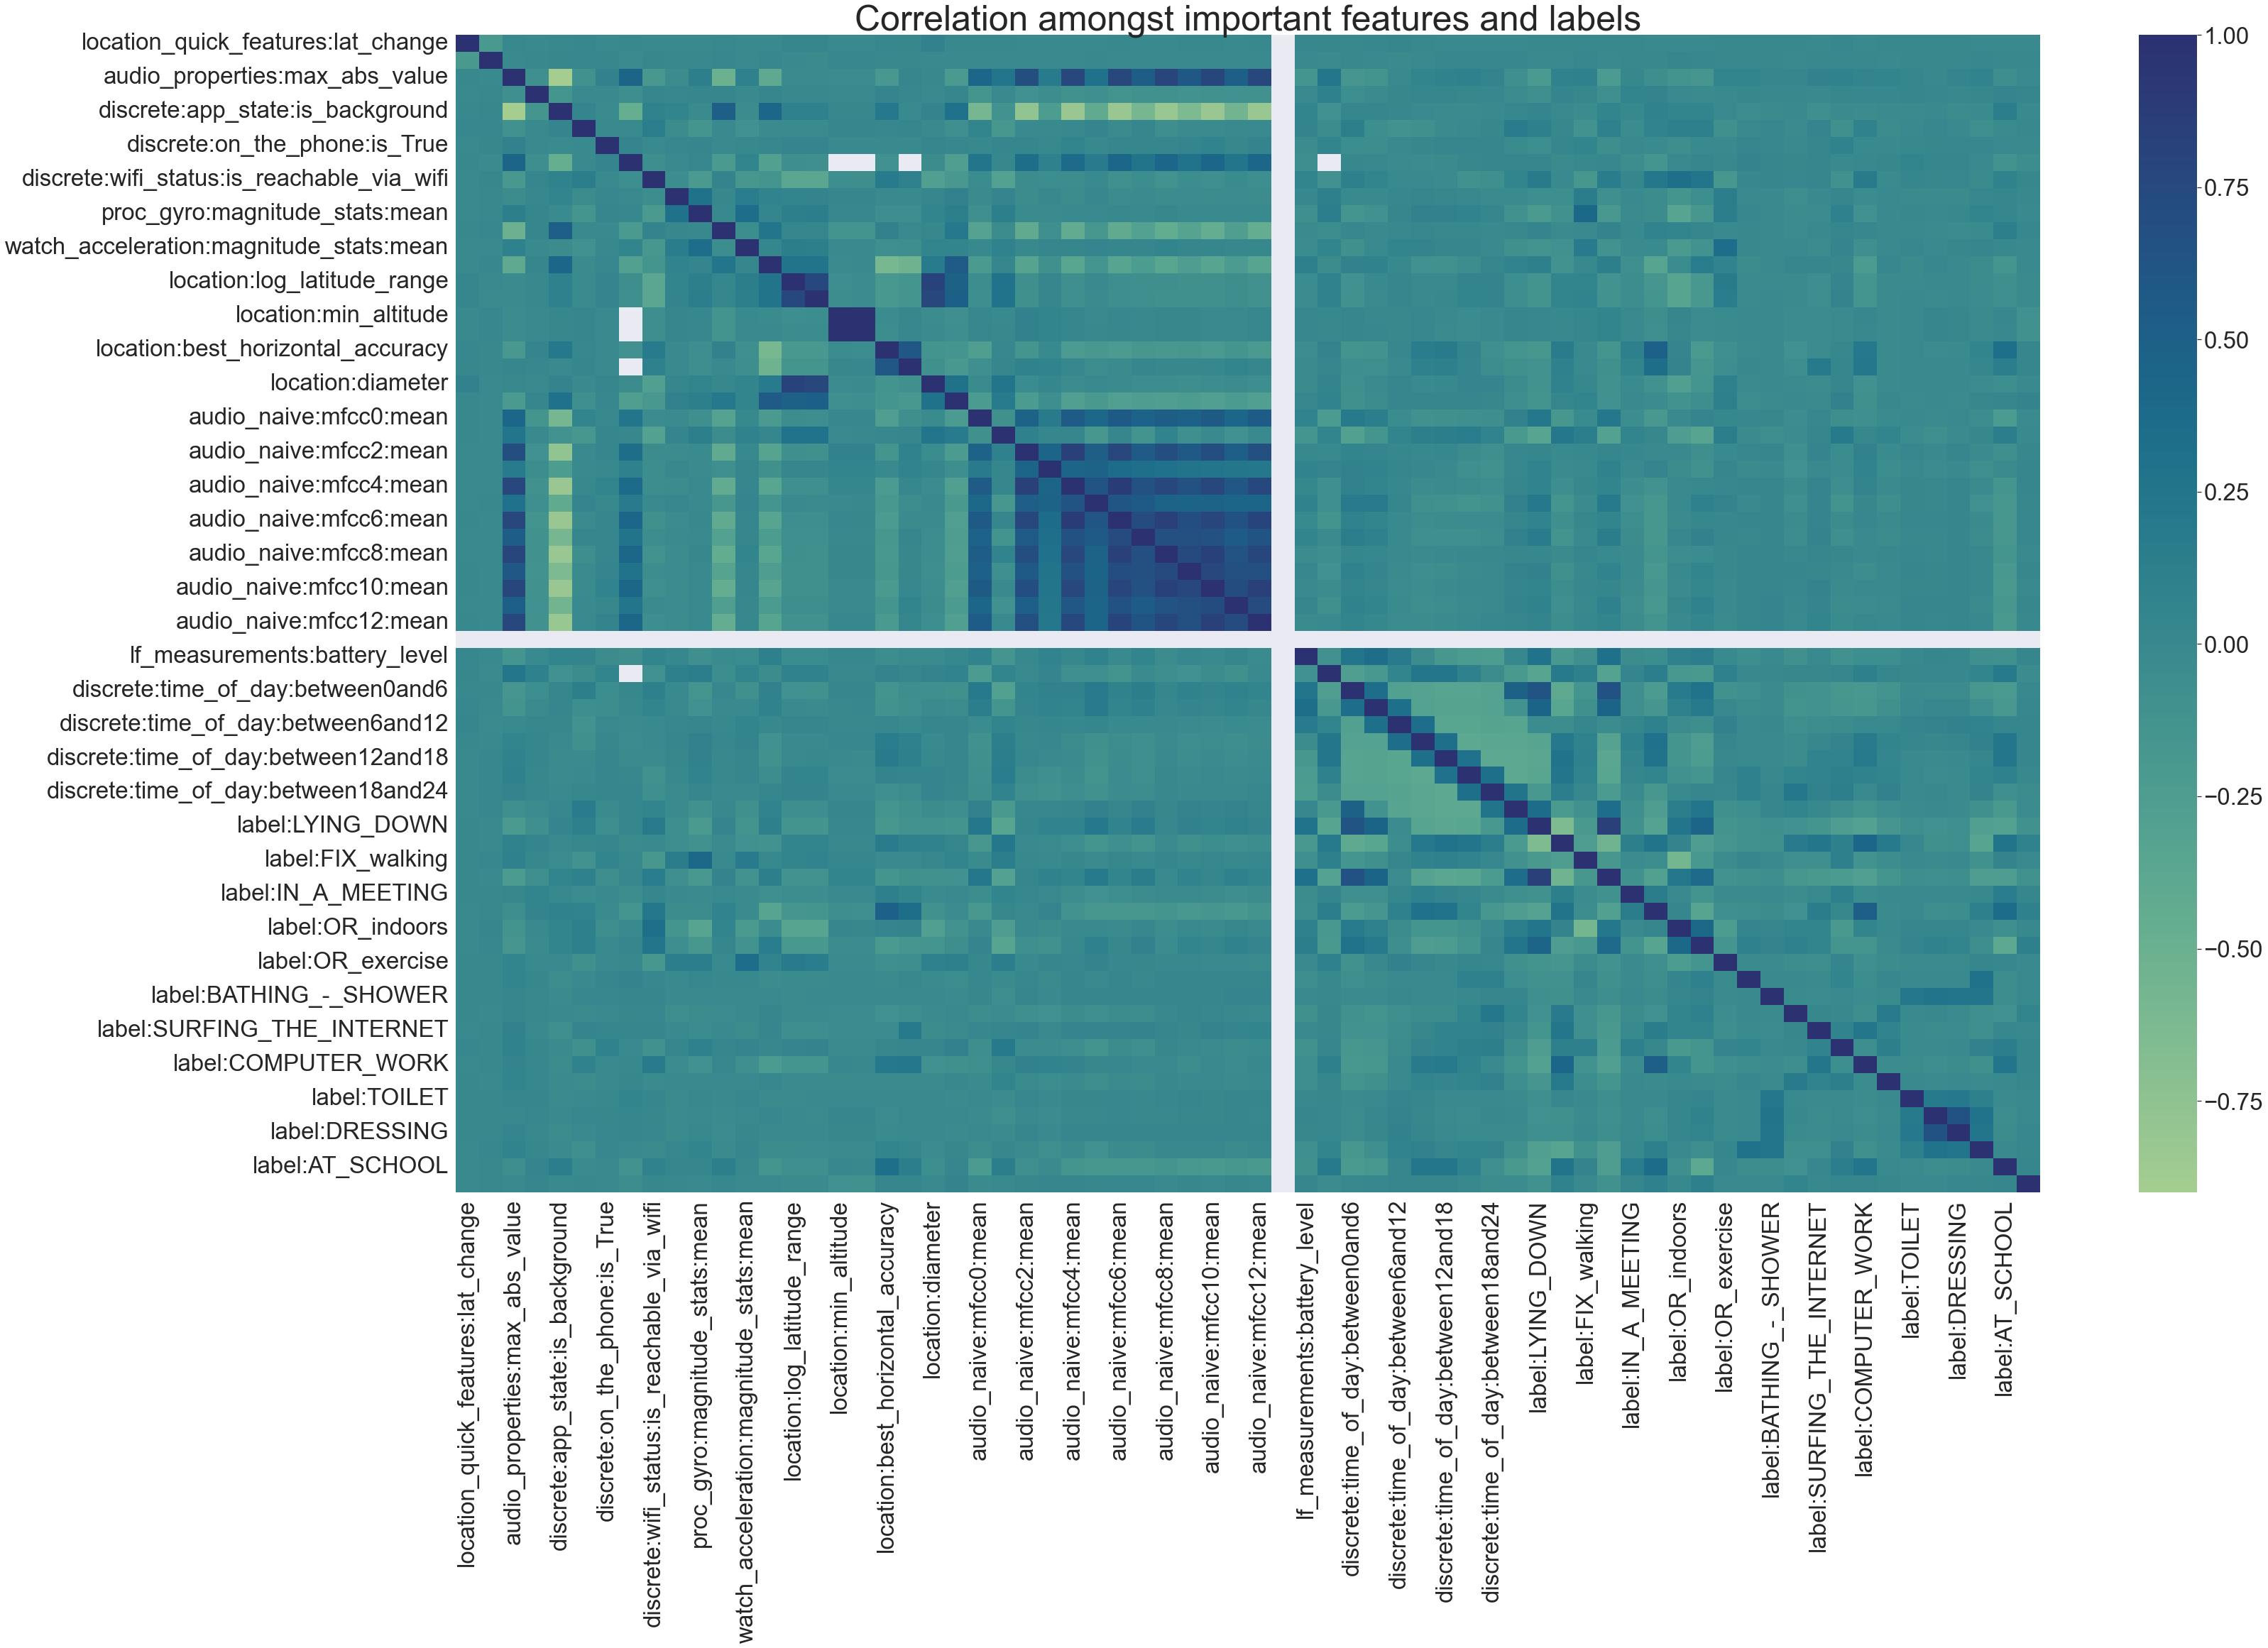

In [50]:
#Powerpoint
plt.figure(figsize = (50, 30))
sns.set(font_scale=3)
sns.heatmap(imp_sensor_data.iloc[:, 3:].corr(), cmap="crest")
# plt.xticks(fontsize = 25)
# plt.yticks(fontsize = 25)
plt.title("Correlation amongst important features and labels", fontsize = 50)
plt.show()

In [51]:
corr_dict = {}
for i in features_cols:
    corrs = {}
    for col in labels_cols:
        corr_val = imp_sensor_data[i].corr(imp_sensor_data[col])
        corrs[i + " and " + col] = corr_val
    corr_dict[max(corrs)] = corrs.get(max(corrs))
corr_dict

{'timestamp and label_source': 0.008904102472386143,
 'location_quick_features:lat_change and label_source': -0.002085224395343743,
 'location_quick_features:long_change and label_source': 0.0009636906978005768,
 'audio_properties:max_abs_value and label_source': -0.007070765508373556,
 'discrete:app_state:is_active and label_source': 0.02892347497314701,
 'discrete:app_state:is_background and label_source': -0.0026110929019241046,
 'discrete:battery_state:is_charging and label_source': -0.0007441694103292062,
 'discrete:on_the_phone:is_True and label_source': -0.009365454088160223,
 'discrete:ringer_mode:is_normal and label_source': -0.047879388396306934,
 'discrete:wifi_status:is_reachable_via_wifi and label_source': 0.015392714243160898,
 'raw_acc:magnitude_stats:mean and label_source': -0.0005529649150930016,
 'proc_gyro:magnitude_stats:mean and label_source': -0.015550470778470936,
 'raw_magnet:magnitude_stats:mean and label_source': 0.011829026205697576,
 'watch_acceleration:magn

In [52]:
max({"1": 2, "4": 4})

'4'

In [53]:
# for i in features_cols:
#     for col in labels_cols:
#         data = imp_sensor_data.dropna(subset = [i, col])
#         sns.boxplot(data = data, x = i, y = col)
#         plt.show()

In [54]:
#Finding what combinations of labels are common
sim_dict = {}
for j in range(len(labels_cols)):
    for i in range(len(labels_cols)):
        if j == i:
            pass
        else:
            col = labels_cols[j]
            col_2 = labels_cols[i]
            sim_val = (imp_sensor_data[col] == imp_sensor_data[col_2]).value_counts().loc[True]
            if not col_2 + " and " + col in sim_dict:
                sim_dict[col + " and " + col_2] = sim_val
sim_dict

{'label:LYING_DOWN and label:SITTING': 65079,
 'label:LYING_DOWN and label:FIX_walking': 177813,
 'label:LYING_DOWN and label:SLEEPING': 264188,
 'label:LYING_DOWN and label:IN_A_MEETING': 142158,
 'label:LYING_DOWN and label:LOC_main_workplace': 82143,
 'label:LYING_DOWN and label:OR_indoors': 108124,
 'label:LYING_DOWN and label:LOC_home': 208637,
 'label:LYING_DOWN and label:OR_exercise': 147911,
 'label:LYING_DOWN and label:COOKING': 128392,
 'label:LYING_DOWN and label:BATHING_-_SHOWER': 128838,
 'label:LYING_DOWN and label:WATCHING_TV': 117229,
 'label:LYING_DOWN and label:SURFING_THE_INTERNET': 110991,
 'label:LYING_DOWN and label:TALKING': 148109,
 'label:LYING_DOWN and label:COMPUTER_WORK': 116294,
 'label:LYING_DOWN and label:EATING': 175976,
 'label:LYING_DOWN and label:TOILET': 140109,
 'label:LYING_DOWN and label:GROOMING': 124194,
 'label:LYING_DOWN and label:DRESSING': 133144,
 'label:LYING_DOWN and label:OR_standing': 162103,
 'label:LYING_DOWN and label:AT_SCHOOL': 128

In [55]:
label_comb = dict(sorted(sim_dict.items(), key=lambda item: item[1], reverse = True))
label_comb

{'label:LYING_DOWN and label:SLEEPING': 264188,
 'label:FIX_walking and label:EATING': 257318,
 'label:FIX_walking and label:OR_standing': 246676,
 'label:EATING and label:OR_standing': 245406,
 'label:TALKING and label:EATING': 236961,
 'label:FIX_walking and label:TALKING': 231758,
 'label:TALKING and label:OR_standing': 221564,
 'label:FIX_walking and label:OR_exercise': 215886,
 'label:OR_exercise and label:EATING': 210704,
 'label:IN_A_MEETING and label:EATING': 210622,
 'label:FIX_walking and label:IN_A_MEETING': 208649,
 'label:LYING_DOWN and label:LOC_home': 208637,
 'label:FIX_walking and label:AT_SCHOOL': 205832,
 'label:EATING and label:TOILET': 204057,
 'label:OR_exercise and label:OR_standing': 203786,
 'label:IN_A_MEETING and label:OR_standing': 201239,
 'label:FIX_walking and label:TOILET': 199493,
 'label:EATING and label:AT_SCHOOL': 197747,
 'label:OR_standing and label:AT_SCHOOL': 195666,
 'label:EATING and label:DRESSING': 194976,
 'label:COOKING and label:EATING': 1

In [56]:
list(label_comb.values())[:20]

[264188,
 257318,
 246676,
 245406,
 236961,
 231758,
 221564,
 215886,
 210704,
 210622,
 208649,
 208637,
 205832,
 204057,
 203786,
 201239,
 199493,
 197747,
 195666,
 194976]

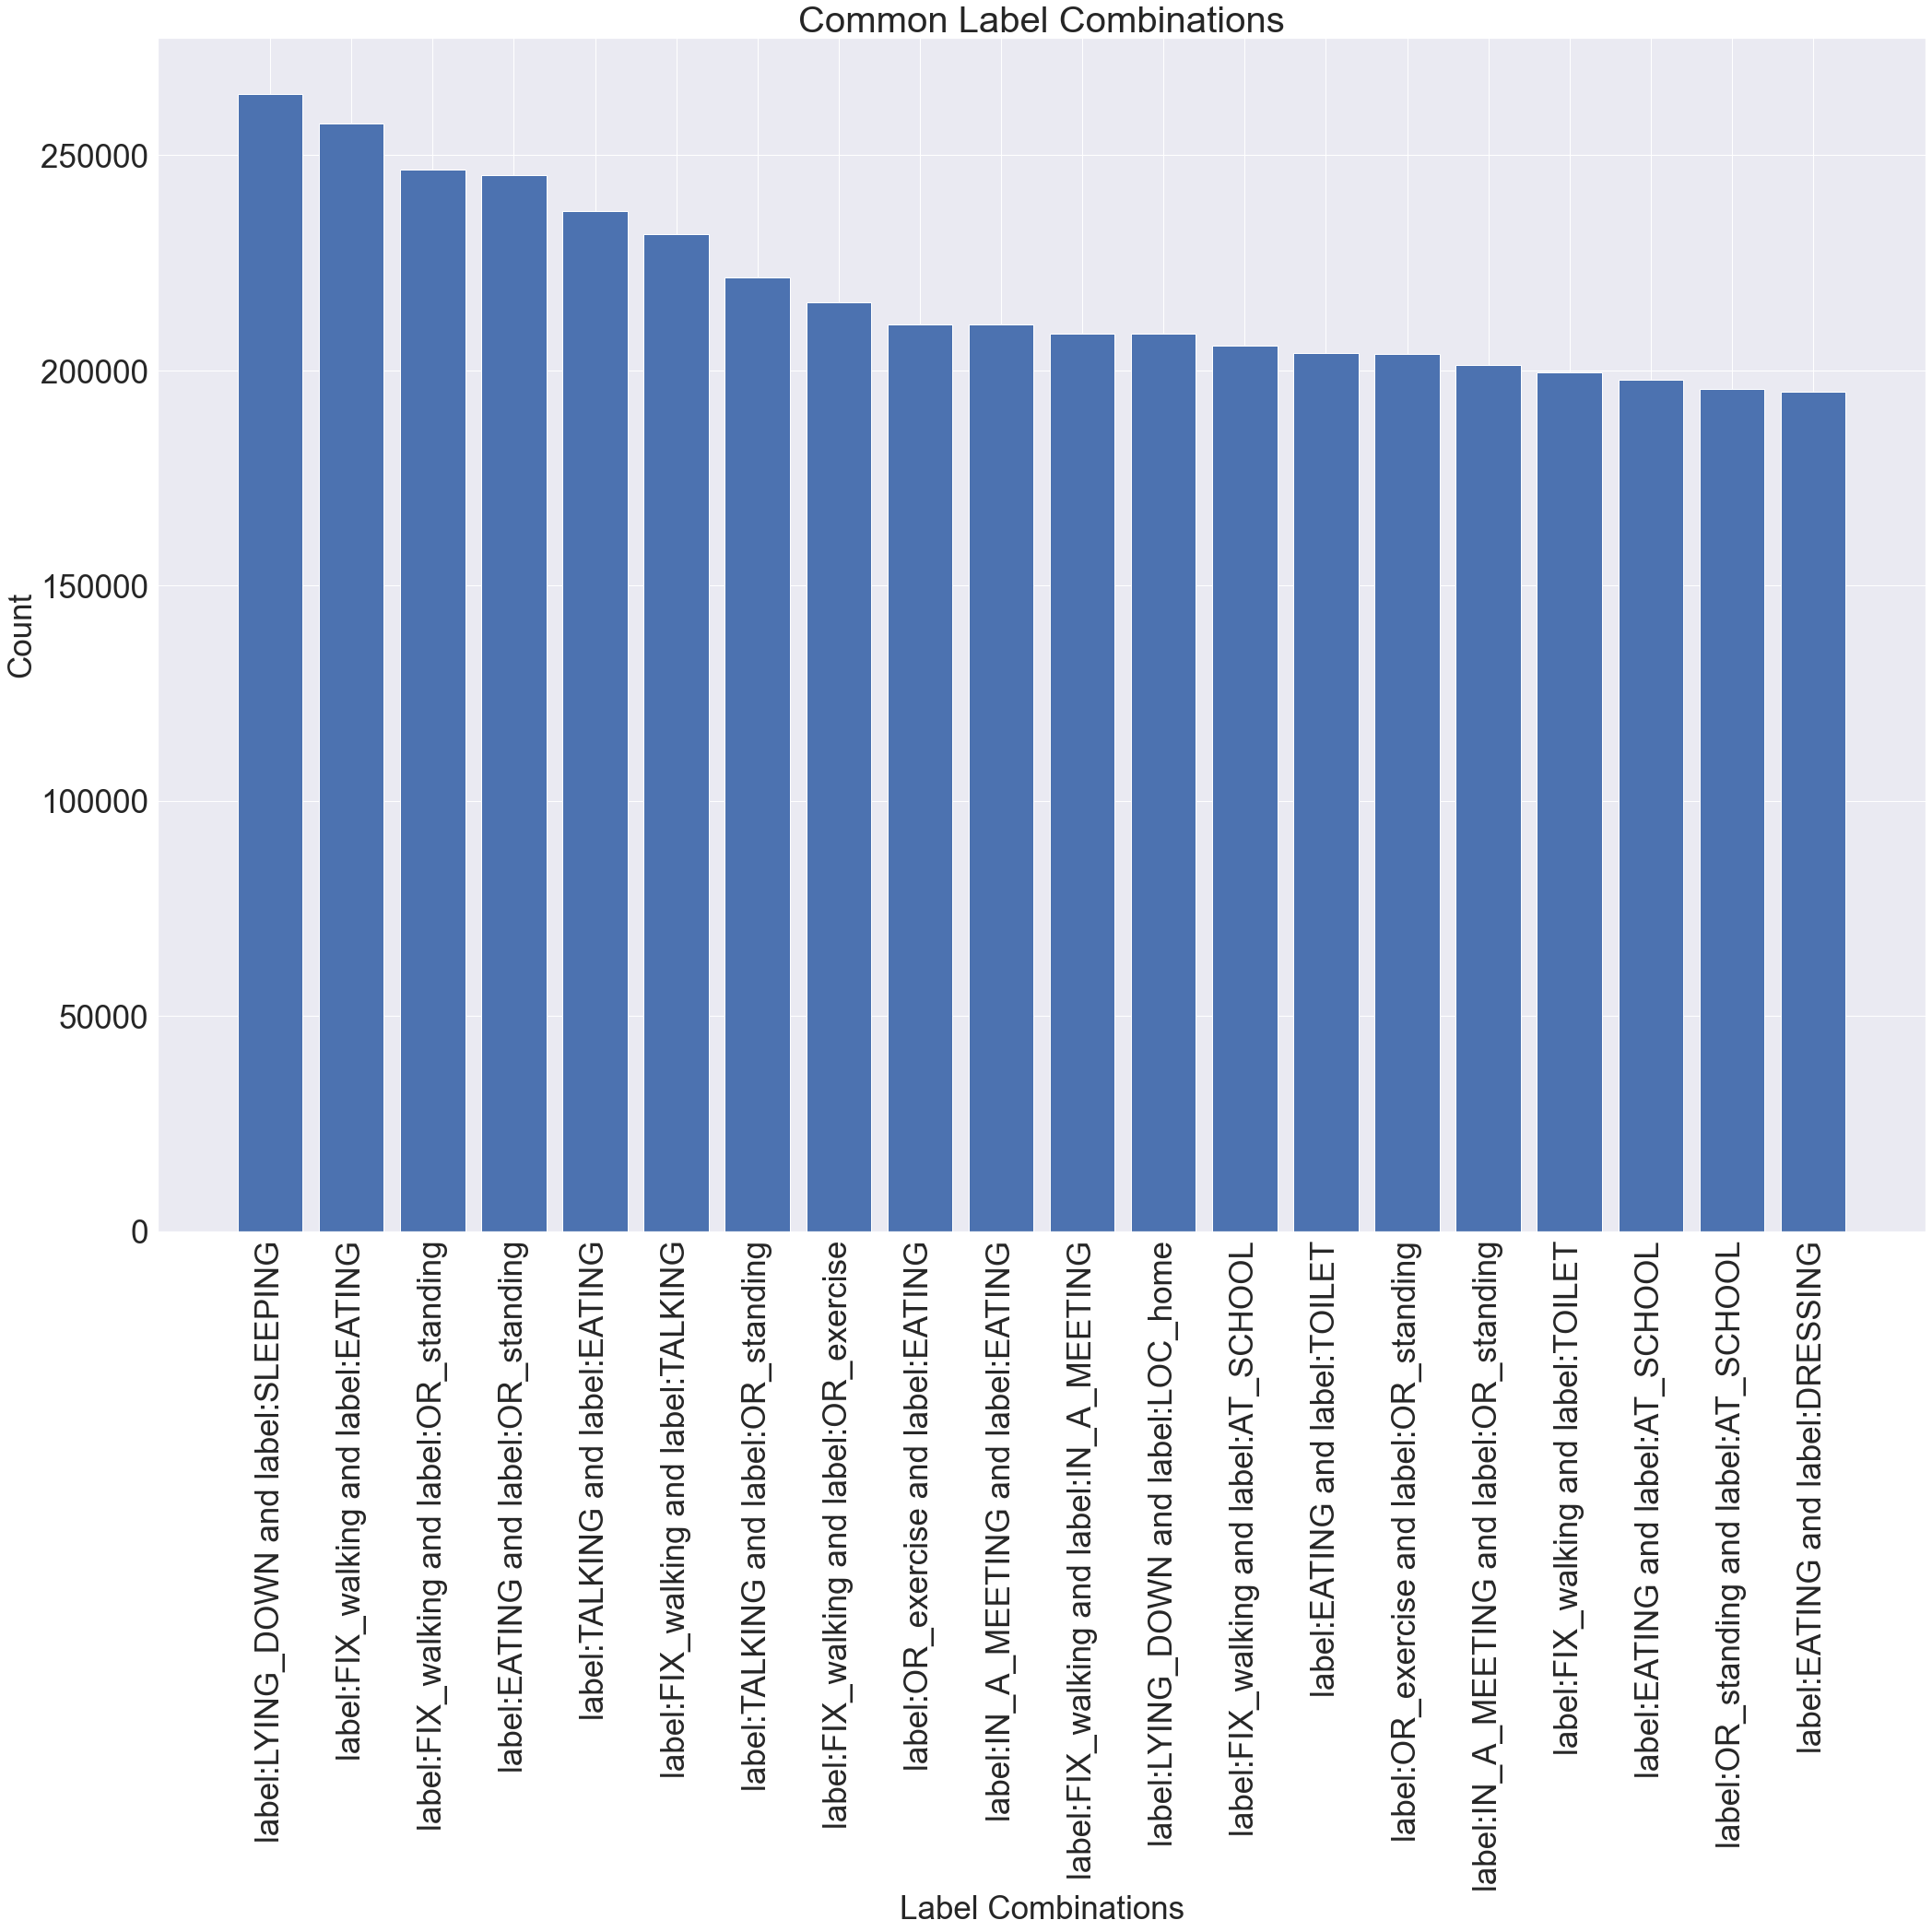

In [57]:
#Powerpoint
plt.figure(figsize = (30, 30))
plt.bar(list(label_comb.keys())[:20], list(label_comb.values())[:20])
plt.xticks(rotation = 90, fontsize = 35)
plt.yticks(fontsize = 35)
plt.xlabel("Label Combinations", fontsize = 35)
plt.ylabel("Count", fontsize = 35)
plt.title("Common Label Combinations", fontsize = 40)
plt.tight_layout()
plt.savefig("label_combinations.png")
plt.show()

## Linear relationship between features, one for each sensor, and top 5 labels

In [58]:
imp_sensor_data

uuid  id   timestamp  \
0       00EABED2-271D-49D8-B599-1D4A09240601   1  1444079161   
1       00EABED2-271D-49D8-B599-1D4A09240601   1  1444079221   
2       00EABED2-271D-49D8-B599-1D4A09240601   1  1444079281   
3       00EABED2-271D-49D8-B599-1D4A09240601   1  1444079341   
4       00EABED2-271D-49D8-B599-1D4A09240601   1  1444079431   
...                                      ...  ..         ...   
377341  FDAA70A1-42A3-4E3F-9AE3-3FDA412E03BF  60  1444234779   
377342  FDAA70A1-42A3-4E3F-9AE3-3FDA412E03BF  60  1444234839   
377343  FDAA70A1-42A3-4E3F-9AE3-3FDA412E03BF  60  1444234899   
377344  FDAA70A1-42A3-4E3F-9AE3-3FDA412E03BF  60  1444234959   
377345  FDAA70A1-42A3-4E3F-9AE3-3FDA412E03BF  60  1444235019   

        location_quick_features:lat_change  \
0                                -0.000067   
1                                -0.000021   
2                                -0.000005   
3                                 0.000007   
4                                 0.000002   
...                                    ...   
377341                            0.000024   
377342                           -0.000038   
377343                           -0.000027   
377344                           -0.000033   
377345                            0.000287   

        location_quick_features:long_change  audio_properties:max_abs_value  \
0                                 -0.000073                       -2.605413   
1                                  0.000013                       -2.536529   
2                                  0.000003                       -2.419184   
3                                  0.000004                       -2.486476   
4                                 -0.000008                       -0.546656   
...                                     ...                             ...   
377341                             0.000015                       -1.443833   
377342                            -0.000015                       -0.047784   
377343                            -0.000004                       -0.010924   
377344                            -0.000015                       -0.011544   
377345                            -0.000526                       -1.897703   

        discrete:app_state:is_active  discrete:app_state:is_background  \
0                                0.0                               0.0   
1                                1.0                               0.0   
2                                1.0                               0.0   
3                                1.0                               0.0   
4                                0.0                               0.0   
...                              ...                               ...   
377341                           0.0                               1.0   
377342                           0.0                               1.0   
377343                           0.0                               1.0   
377344                           0.0                               1.0   
377345                           0.0                               1.0   

        discrete:battery_state:is_charging  discrete:on_the_phone:is_True  \
0                                      1.0                            0.0   
1                                      1.0                            0.0   
2                                      1.0                            0.0   
3                                      1.0                            0.0   
4                                      0.0                            0.0   
...                                    ...                            ...   
377341                                 0.0                            0.0   
377342                                 0.0                            0.0   
377343                                 0.0                            0.0   
377344                                 0.0                            0.0   
377345                           

In [59]:
imp_subset_cols = ["uuid", "id", "timestamp", "raw_acc:magnitude_stats:mean", "proc_gyro:magnitude_stats:mean", "raw_magnet:magnitude_stats:mean", "watch_acceleration:magnitude_stats:mean", "location:log_latitude_range", "location_quick_features:lat_change", "audio_naive:mfcc0:mean", "discrete:app_state:is_active", "discrete:battery_state:is_charging", "discrete:on_the_phone:is_True", "discrete:wifi_status:is_reachable_via_wifi", "discrete:time_of_day:between0and6", "discrete:time_of_day:between3and9", "discrete:time_of_day:between6and12", "discrete:time_of_day:between9and15", "discrete:time_of_day:between12and18", "discrete:time_of_day:between15and21", "discrete:time_of_day:between18and24", "discrete:time_of_day:between21and3", "lf_measurements:battery_level", "lf_measurements:screen_brightness", "label:OR_indoors", "label:LOC_home", "label:SITTING", "label:PHONE_ON_TABLE", "label:LYING_DOWN"]
print(len(imp_subset_cols))

29


In [60]:
imp_subset = sensor_data[imp_subset_cols]
imp_subset

uuid  id   timestamp  \
0       00EABED2-271D-49D8-B599-1D4A09240601   1  1444079161   
1       00EABED2-271D-49D8-B599-1D4A09240601   1  1444079221   
2       00EABED2-271D-49D8-B599-1D4A09240601   1  1444079281   
3       00EABED2-271D-49D8-B599-1D4A09240601   1  1444079341   
4       00EABED2-271D-49D8-B599-1D4A09240601   1  1444079431   
...                                      ...  ..         ...   
377341  FDAA70A1-42A3-4E3F-9AE3-3FDA412E03BF  60  1444234779   
377342  FDAA70A1-42A3-4E3F-9AE3-3FDA412E03BF  60  1444234839   
377343  FDAA70A1-42A3-4E3F-9AE3-3FDA412E03BF  60  1444234899   
377344  FDAA70A1-42A3-4E3F-9AE3-3FDA412E03BF  60  1444234959   
377345  FDAA70A1-42A3-4E3F-9AE3-3FDA412E03BF  60  1444235019   

        raw_acc:magnitude_stats:mean  proc_gyro:magnitude_stats:mean  \
0                           0.996815                        0.002558   
1                           0.996864                        0.002279   
2                           0.996825                        0.002579   
3                           0.996874                        0.002497   
4                           0.997371                        0.105566   
...                              ...                             ...   
377341                      1.007886                        0.020239   
377342                      1.000400                        0.007604   
377343                      1.026223                        1.012825   
377344                      1.123513                        2.140000   
377345                      1.020624                        0.580213   

        raw_magnet:magnitude_stats:mean  \
0                            618.751929   
1                            618.834334   
2                            618.632716   
3                            618.757055   
4                            613.681143   
...                                 ...   
377341                       294.436104   
377342                       297.698475   
377343                       285.568055   
377344                       281.195670   
377345                       287.503533   

        watch_acceleration:magnitude_stats:mean  location:log_latitude_range  \
0                                   1032.508157                     0.064895   
1                                   1031.283026                     0.072793   
2                                   1031.643125                     0.004599   
3                                   1032.123385                     0.017508   
4                                   1042.973796                     0.033513   
...                                         ...                          ...   
377341                                      NaN                     0.045462   
377342                                      NaN                     0.050042   
377343                                      NaN                     0.035318   
377344                                      NaN                     0.132521   
377345                                      NaN                     0.329295   

        location_quick_features:lat_change  audio_naive:mfcc0:mean  \
0                                -0.000067               -4.219657   
1                                -0.000021               -7.505606   
2                                -0.000005               -7.966769   
3                                 0.000007               -5.367933   
4                                 0.000002              -13.415772   
...                                    ...                     ...   
377341                            0.000024               -9.006405   
377342                           -0.000038              -18.125463   
377343                           -0.000027              -12.744711   
377344                           -0.000033              -16.154527   
377345                            0.000287               -5.589085   

        discrete:app_state:is_active  discrete:battery_state:is_charging  \
0          

In [61]:
imp_subset.iloc[:, 3:].corr()

raw_acc:magnitude_stats:mean  \
raw_acc:magnitude_stats:mean                                    1.000000   
proc_gyro:magnitude_stats:mean                                  0.292492   
raw_magnet:magnitude_stats:mean                                 0.019697   
watch_acceleration:magnitude_stats:mean                         0.160207   
location:log_latitude_range                                     0.065523   
location_quick_features:lat_change                             -0.002224   
audio_naive:mfcc0:mean                                         -0.027042   
discrete:app_state:is_active                                    0.010302   
discrete:battery_state:is_charging                             -0.042040   
discrete:on_the_phone:is_True                                   0.009166   
discrete:wifi_status:is_reachable_via_wifi                     -0.046650   
discrete:time_of_day:between0and6                              -0.011434   
discrete:time_of_day:between3and9                              -0.003124   
discrete:time_of_day:between6and12                              0.009814   
discrete:time_of_day:between9and15                              0.021604   
discrete:time_of_day:between12and18                             0.020216   
discrete:time_of_day:between15and21                             0.002823   
discrete:time_of_day:between18and24                            -0.019289   
discrete:time_of_day:between21and3                             -0.024065   
lf_measurements:battery_level                                   0.008933   
lf_measurements:screen_brightness                               0.120281   
label:OR_indoors                                               -0.148506   
label:LOC_home                                                 -0.055518   
label:SITTING                                                  -0.059933   
label:PHONE_ON_TABLE                                           -0.194960   
label:LYING_DOWN                                               -0.054827   

                                            proc_gyro:magnitude_stats:mean  \
raw_acc:magnitude_stats:mean                                      0.292492   
proc_gyro:magnitude_stats:mean                                    1.000000   
raw_magnet:magnitude_stats:mean                                   0.000795   
watch_acceleration:magnitude_stats:mean                           0.345740   
location:log_latitude_range                                       0.130157   
location_quick_features:lat_change                               -0.005082   
audio_naive:mfcc0:mean                                           -0.069784   
discrete:app_state:is_active                                      0.033730   
discrete:battery_state:is_charging                               -0.152130   
discrete:on_the_phone:is_True                                     0.032281   
discrete:wifi_status:is_reachable_via_wifi                       -0.215560   
discrete:time_of_day:between0and6                                -0.151926   
discrete:time_of_day:between3and9                                -0.091783   
discrete:time_of_day:between6and12                                0.031543   
discrete:time_of_day:between9and15                                0.084463   
discrete:time_of_day:between12and18                               0.082743   
discrete:time_of_day:between15and21                               0.077517   
discrete:time_of_day:between18and24                               0.027633   
discrete:time_of_day:between21and3                               -0.104232   
lf_measurements:battery_level                                    -0.082240   
lf_measurements:screen_brightness                                 0.132688   
label:OR_indoors                                                 -0.342007   
label:LOC_home                                                   -0.173220   
label:SITTING                                                    -0.110351   
label:PHONE_ON_TABLE                     

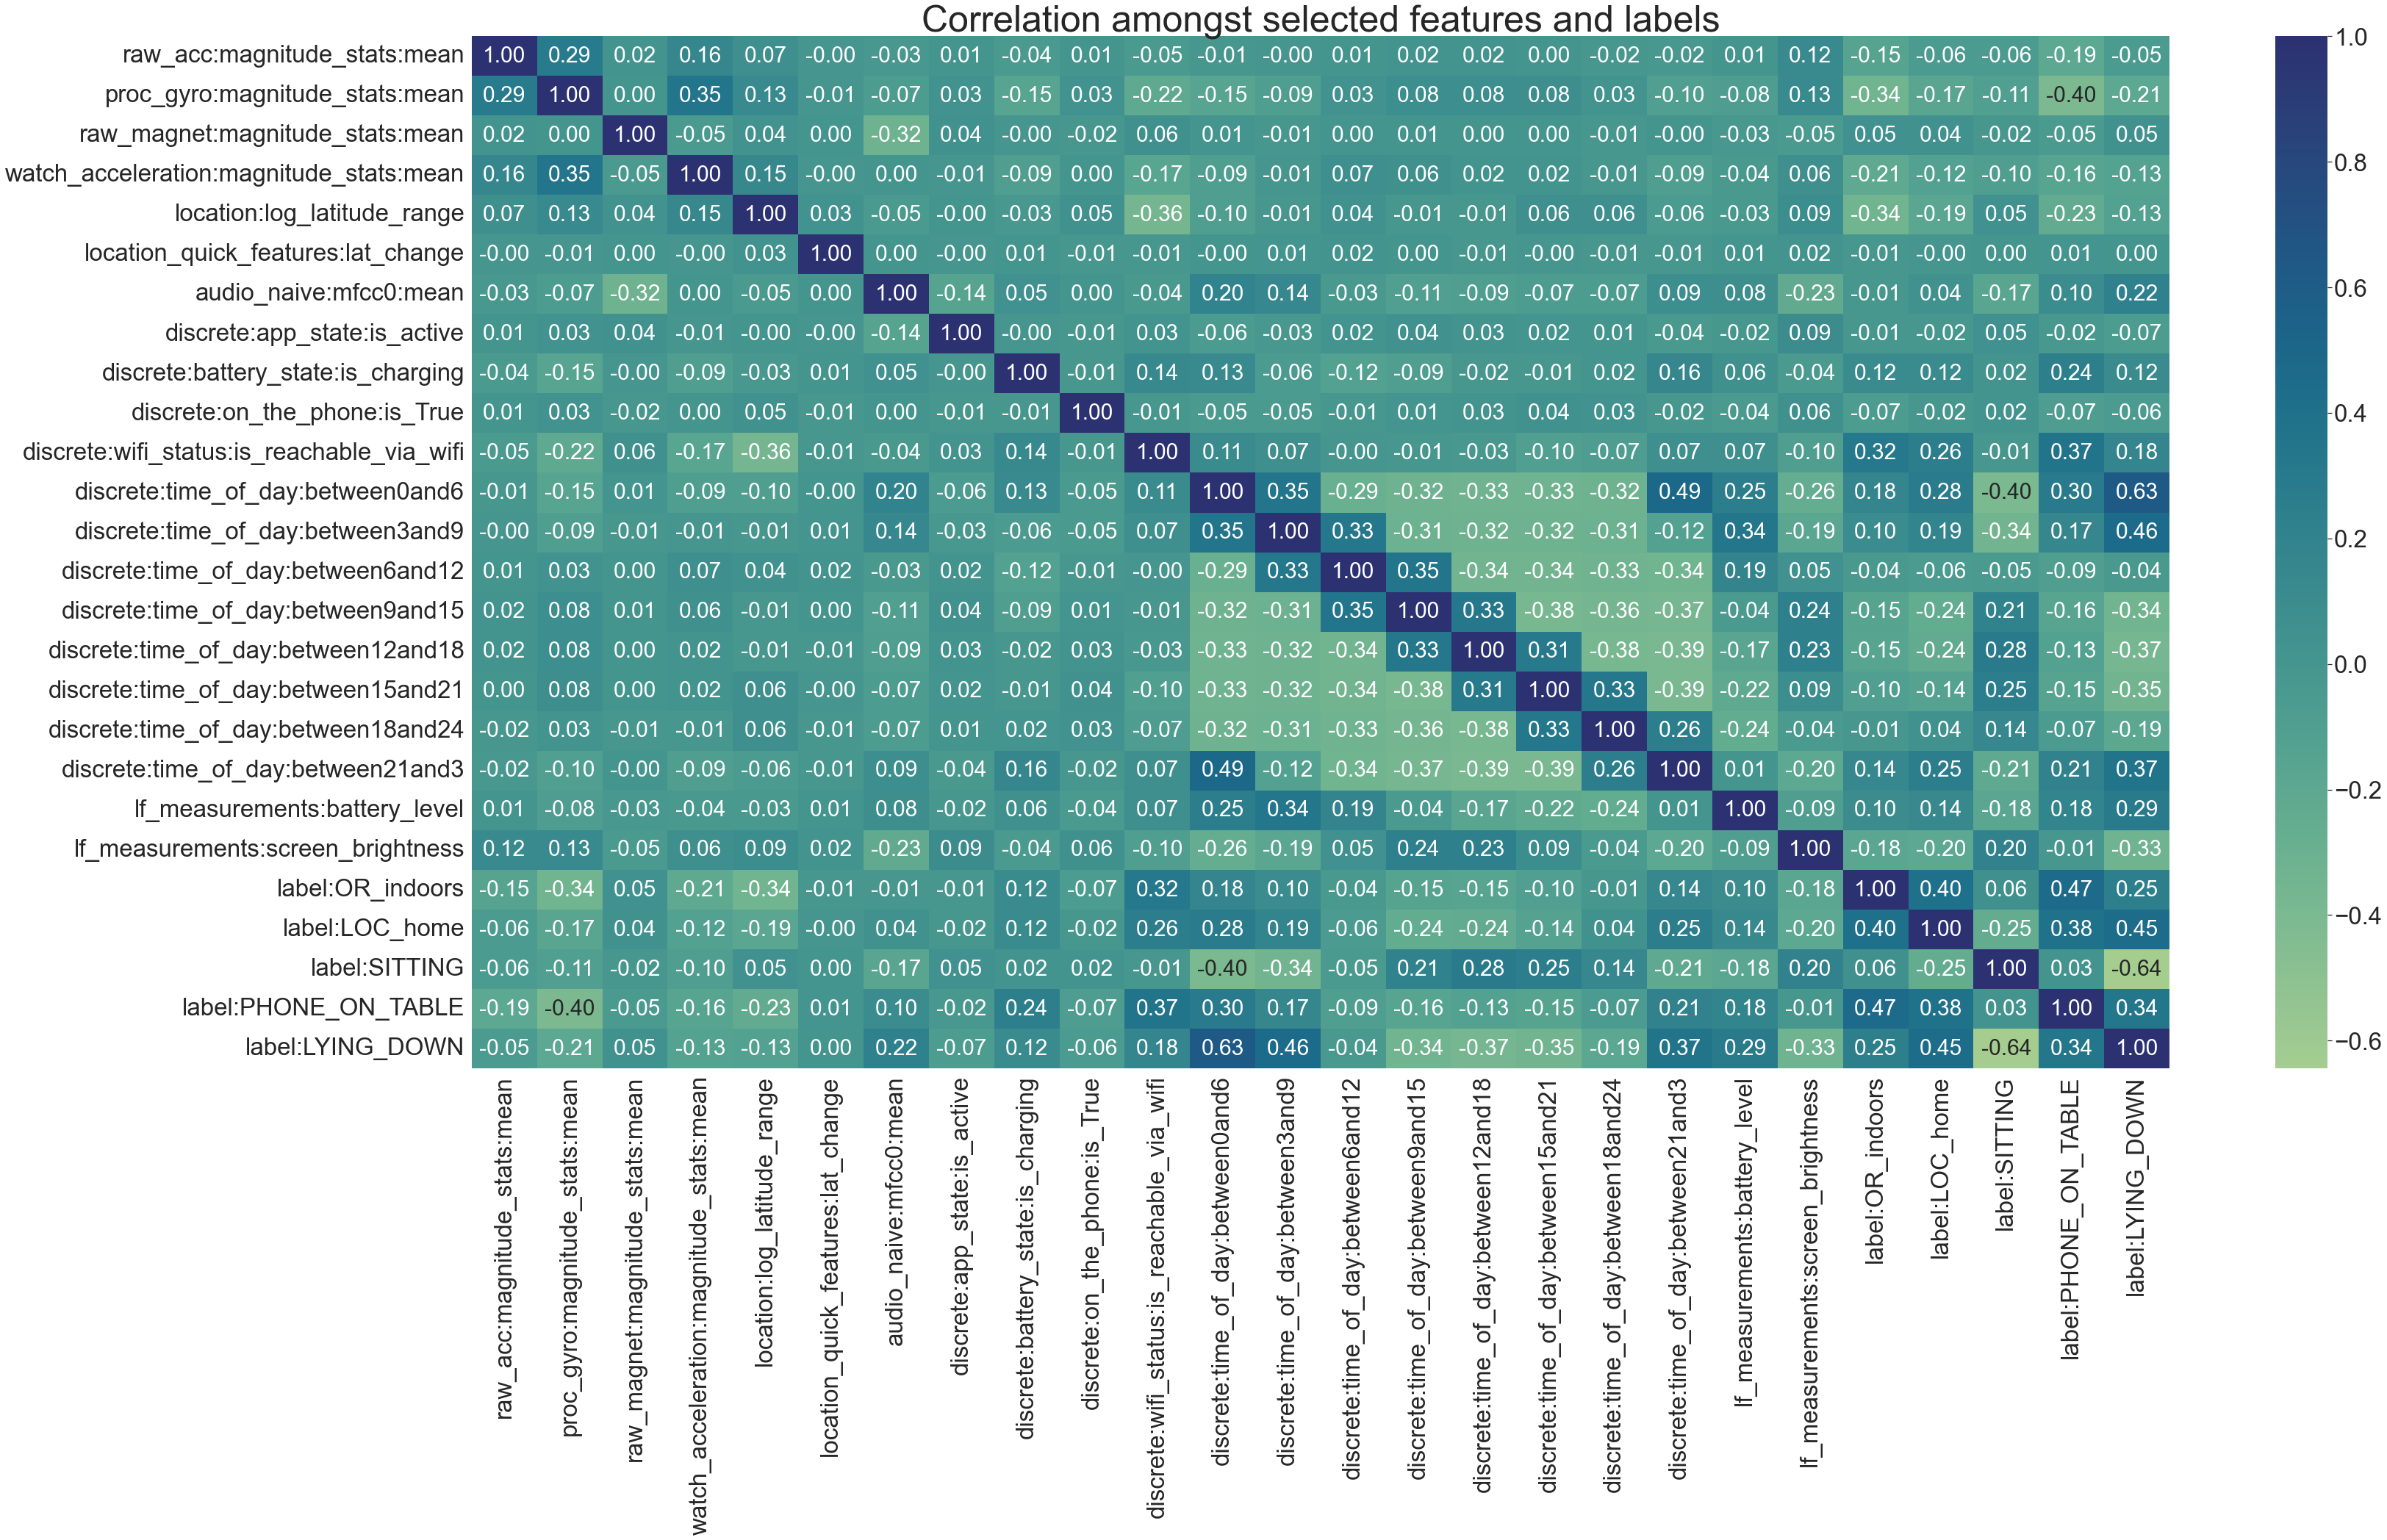

In [62]:
#Powerpoint
plt.figure(figsize = (50, 30))
sns.set(font_scale=3)
sns.heatmap(imp_subset.iloc[:, 3:].corr(), annot=True, fmt=".2f", annot_kws = {"fontsize":30}, cmap="crest")
# plt.xticks(fontsize = 25)
# plt.yticks(fontsize = 25)
plt.title("Correlation amongst selected features and labels", fontsize = 50)
plt.tight_layout()
plt.savefig("correlation.png")
plt.show()

# Model

In [63]:
#Splitting the data
imp_subset = imp_subset.dropna()
train, test = train_test_split(imp_subset, test_size = 0.2, random_state=42)
print(len(train))
print(len(test))

27188
6798


In [64]:
#Check for representation of all users in both train and test data
print(len(train["id"].unique()))
print(len(test["id"].unique()))

25
25


In [65]:
#Getting features and labels
x_train = train[["id", "raw_acc:magnitude_stats:mean", "proc_gyro:magnitude_stats:mean", "raw_magnet:magnitude_stats:mean", "watch_acceleration:magnitude_stats:mean", "location:log_latitude_range", "location_quick_features:lat_change", "audio_naive:mfcc0:mean", "discrete:app_state:is_active", "discrete:battery_state:is_charging", "discrete:on_the_phone:is_True", "discrete:wifi_status:is_reachable_via_wifi", "discrete:time_of_day:between0and6", "discrete:time_of_day:between3and9", "discrete:time_of_day:between6and12", "discrete:time_of_day:between9and15", "discrete:time_of_day:between12and18", "discrete:time_of_day:between15and21", "discrete:time_of_day:between18and24", "discrete:time_of_day:between21and3", "lf_measurements:battery_level", "lf_measurements:screen_brightness"]].to_numpy()
y_train = train[["label:OR_indoors", "label:LOC_home", "label:SITTING", "label:PHONE_ON_TABLE", "label:LYING_DOWN"]].to_numpy()

x_test = test[["id", "raw_acc:magnitude_stats:mean", "proc_gyro:magnitude_stats:mean", "raw_magnet:magnitude_stats:mean", "watch_acceleration:magnitude_stats:mean", "location:log_latitude_range", "location_quick_features:lat_change", "audio_naive:mfcc0:mean", "discrete:app_state:is_active", "discrete:battery_state:is_charging", "discrete:on_the_phone:is_True", "discrete:wifi_status:is_reachable_via_wifi", "discrete:time_of_day:between0and6", "discrete:time_of_day:between3and9", "discrete:time_of_day:between6and12", "discrete:time_of_day:between9and15", "discrete:time_of_day:between12and18", "discrete:time_of_day:between15and21", "discrete:time_of_day:between18and24", "discrete:time_of_day:between21and3", "lf_measurements:battery_level", "lf_measurements:screen_brightness"]].to_numpy()
y_test = test[["label:OR_indoors", "label:LOC_home", "label:SITTING", "label:PHONE_ON_TABLE", "label:LYING_DOWN"]].to_numpy()

print(x_test.shape)
print(y_test.shape)

(6798, 22)
(6798, 5)


In [66]:
# y_train = np.where(y_train == 0.0, "No", "Yes")
# y_test = np.where(y_test == 0.0, "No", "Yes")

In [67]:
#Custom function for rounding tensors
def rounding_layer(new_input):
    outputs = tf.math.rint(new_input)
#     a = 0.5 * round(outputs/0.5)
#     print(a)
#     outputs = tf.where(True, a, outputs)
    return outputs

In [68]:
#Model for predicting the activity of a user based on the features
def build_model():
    #Input layer
    input_layer = Input(shape = (22,), dtype=tf.float32)
    dense_layer = Dense(units = "5")(input_layer)
    output_layer = Dense(units = "5")(dense_layer)
#     round_layer = Lambda(rounding_layer)(output_layer)
#     round_layer = Lambda(lambda x: 0.0 if "No" else 1.0)(output_layer)
    
    model = Model(inputs = input_layer, outputs = output_layer)
    return model

In [69]:
# optimizer = tf.keras.optimizers.Adagrad(learning_rate = 0.1)  # eval scores [0.1756269484758377, 0.4190787374973297]
# optimizer = tf.keras.optimizers.Adam(learning_rate = 0.1)  # eval scores [0.17346014082431793, 0.4164854884147644]
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01)  # eval scores [0.15849953889846802, 0.3981200158596039]
# optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)   # eval scores [0.17278656363487244, 0.4156760275363922]
loss = tf.keras.losses.MeanSquaredError()

model = build_model()
model.compile(optimizer = optimizer, loss=loss, metrics=[tf.keras.metrics.RootMeanSquaredError()])
history = model.fit(x_train, y_train, validation_split = 0.2, epochs = 100)

Epoch 1/100
680/680 [==============================] - 3s 3ms/step - loss: 1078.3192 - root_mean_squared_error: 32.8378 - val_loss: 0.6967 - val_root_mean_squared_error: 0.8347
Epoch 2/100
680/680 [==============================] - 1s 2ms/step - loss: 0.4871 - root_mean_squared_error: 0.6979 - val_loss: 0.3338 - val_root_mean_squared_error: 0.5778
Epoch 3/100
680/680 [==============================] - 1s 1ms/step - loss: 0.2661 - root_mean_squared_error: 0.5159 - val_loss: 0.2179 - val_root_mean_squared_error: 0.4667
Epoch 4/100
680/680 [==============================] - 1s 2ms/step - loss: 0.1947 - root_mean_squared_error: 0.4412 - val_loss: 0.1754 - val_root_mean_squared_error: 0.4188
Epoch 5/100
680/680 [==============================] - 1s 1ms/step - loss: 0.1722 - root_mean_squared_error: 0.4150 - val_loss: 0.1687 - val_root_mean_squared_error: 0.4107
Epoch 6/100
680/680 [==============================] - 1s 2ms/step - loss: 0.1638 - root_mean_squared_error: 0.4047 - val_loss: 0.1

680/680 [==============================] - 1s 2ms/step - loss: 0.1282 - root_mean_squared_error: 0.3581 - val_loss: 0.1331 - val_root_mean_squared_error: 0.3648
Epoch 49/100
680/680 [==============================] - 1s 2ms/step - loss: 0.1304 - root_mean_squared_error: 0.3611 - val_loss: 0.1319 - val_root_mean_squared_error: 0.3632
Epoch 50/100
680/680 [==============================] - 1s 1ms/step - loss: 0.1329 - root_mean_squared_error: 0.3645 - val_loss: 0.1407 - val_root_mean_squared_error: 0.3751
Epoch 51/100
680/680 [==============================] - 1s 2ms/step - loss: 0.1337 - root_mean_squared_error: 0.3656 - val_loss: 0.1612 - val_root_mean_squared_error: 0.4015
Epoch 52/100
680/680 [==============================] - 1s 2ms/step - loss: 0.1356 - root_mean_squared_error: 0.3683 - val_loss: 0.1330 - val_root_mean_squared_error: 0.3647
Epoch 53/100
680/680 [==============================] - 1s 2ms/step - loss: 0.1341 - root_mean_squared_error: 0.3661 - val_loss: 0.1473 - val_r

680/680 [==============================] - 1s 2ms/step - loss: 0.1356 - root_mean_squared_error: 0.3682 - val_loss: 0.1350 - val_root_mean_squared_error: 0.3674
Epoch 96/100
680/680 [==============================] - 1s 2ms/step - loss: 0.1358 - root_mean_squared_error: 0.3685 - val_loss: 0.1429 - val_root_mean_squared_error: 0.3780
Epoch 97/100
680/680 [==============================] - 1s 2ms/step - loss: 0.1350 - root_mean_squared_error: 0.3674 - val_loss: 0.1637 - val_root_mean_squared_error: 0.4045
Epoch 98/100
680/680 [==============================] - 1s 2ms/step - loss: 0.1334 - root_mean_squared_error: 0.3653 - val_loss: 0.1345 - val_root_mean_squared_error: 0.3668
Epoch 99/100
680/680 [==============================] - 1s 1ms/step - loss: 0.1329 - root_mean_squared_error: 0.3645 - val_loss: 0.1364 - val_root_mean_squared_error: 0.3693
Epoch 100/100
680/680 [==============================] - 1s 1ms/step - loss: 0.1347 - root_mean_squared_error: 0.3670 - val_loss: 0.1418 - val_

In [70]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 22)]              0         
                                                                 
 dense (Dense)               (None, 5)                 115       
                                                                 
 dense_1 (Dense)             (None, 5)                 30        
                                                                 
Total params: 145
Trainable params: 145
Non-trainable params: 0
_________________________________________________________________


In [71]:
model.evaluate(x_test, y_test)

213/213 [==============================] - 0s 1ms/step - loss: 0.1409 - root_mean_squared_error: 0.3754


[0.1409147083759308, 0.3753860294818878]

In [72]:
#Predicting activity of users test data
preds = model.predict(x_test)
preds = np.where(abs(preds) > 0.5, 1.0, 0.0)
preds

213/213 [==============================] - 0s 881us/step


array([[1., 1., 1., 1., 0.],
       [1., 1., 0., 1., 1.],
       [0., 0., 1., 0., 0.],
       ...,
       [1., 0., 0., 1., 1.],
       [1., 1., 0., 1., 1.],
       [1., 1., 1., 1., 0.]])

In [73]:
preds_df = pd.DataFrame(preds[:,0], columns = ["label:OR_indoors"])
preds_df["label:LOC_home"] = preds[:,1]
preds_df["label:SITTING"] = preds[:,2]
preds_df["label:PHONE_ON_TABLE"] = preds[:,3]
preds_df["label:LYING_DOWN"] = preds[:,4]
# preds_df.insert(loc = 0, column = "id", value = x_test[:, 0])
preds_df

label:OR_indoors  label:LOC_home  label:SITTING  label:PHONE_ON_TABLE  \
0                  1.0             1.0            1.0                   1.0   
1                  1.0             1.0            0.0                   1.0   
2                  0.0             0.0            1.0                   0.0   
3                  1.0             1.0            1.0                   1.0   
4                  1.0             1.0            1.0                   1.0   
...                ...             ...            ...                   ...   
6793               1.0             1.0            0.0                   1.0   
6794               0.0             0.0            1.0                   0.0   
6795               1.0             0.0            0.0                   1.0   
6796               1.0             1.0            0.0                   1.0   
6797               1.0             1.0            1.0                   1.0   

      label:LYING_DOWN  
0                  0.0  
1                  1.0  
2                  0.0  
3                  0.0  
4                  0.0  
...                ...  
6793               1.0  
6794               0.0  
6795               1.0  
6796               1.0  
6797               0.0  

[6798 rows x 5 columns]

In [74]:
#Powerpoint
#Find out how accurate the model was
pred_true_comp = preds_df == y_test
pred_true_comp
for col in pred_true_comp.columns:
    print(col + ": " + str(((pred_true_comp[col].value_counts().loc[True])/len(pred_true_comp)) * 100))

label:OR_indoors: 94.95439835245661
label:LOC_home: 63.76875551632833
label:SITTING: 75.99293909973521
label:PHONE_ON_TABLE: 80.2147690497205
label:LYING_DOWN: 87.67284495439836


In [75]:
tf.math.rint(4.04)

<tf.Tensor: shape=(), dtype=float32, numpy=4.0>

# Exploring sensor data

In [76]:
features

uuid  id   timestamp  \
0       00EABED2-271D-49D8-B599-1D4A09240601   1  1444079161   
1       00EABED2-271D-49D8-B599-1D4A09240601   1  1444079221   
2       00EABED2-271D-49D8-B599-1D4A09240601   1  1444079281   
3       00EABED2-271D-49D8-B599-1D4A09240601   1  1444079341   
4       00EABED2-271D-49D8-B599-1D4A09240601   1  1444079431   
...                                      ...  ..         ...   
377341  FDAA70A1-42A3-4E3F-9AE3-3FDA412E03BF  60  1444234779   
377342  FDAA70A1-42A3-4E3F-9AE3-3FDA412E03BF  60  1444234839   
377343  FDAA70A1-42A3-4E3F-9AE3-3FDA412E03BF  60  1444234899   
377344  FDAA70A1-42A3-4E3F-9AE3-3FDA412E03BF  60  1444234959   
377345  FDAA70A1-42A3-4E3F-9AE3-3FDA412E03BF  60  1444235019   

        raw_acc:magnitude_stats:mean  raw_acc:magnitude_stats:std  \
0                           0.996815                     0.003529   
1                           0.996864                     0.004172   
2                           0.996825                     0.003667   
3                           0.996874                     0.003541   
4                           0.997371                     0.037653   
...                              ...                          ...   
377341                      1.007886                     0.009355   
377342                      1.000400                     0.009068   
377343                      1.026223                     0.195112   
377344                      1.123513                     0.273450   
377345                      1.020624                     0.135672   

        raw_acc:magnitude_stats:moment3  raw_acc:magnitude_stats:moment4  \
0                             -0.002786                         0.006496   
1                             -0.003110                         0.007050   
2                              0.003094                         0.006076   
3                              0.000626                         0.006059   
4                              0.043389                         0.102332   
...                                 ...                              ...   
377341                         0.012618                         0.030905   
377342                        -0.019631                         0.032762   
377343                         0.255240                         0.379733   
377344                         0.312818                         0.480787   
377345                         0.104091                         0.185868   

        raw_acc:magnitude_stats:percentile25  \
0                                   0.995203   
1                                   0.994957   
2                                   0.994797   
3                                   0.995050   
4                                   0.995548   
...                                      ...   
377341                              1.005121   
377342                              0.998186   
377343                              0.983684   
377344                              0.966631   
377345                              0.915936   

        raw_acc:magnitude_stats:percentile50  \
0                                   0.996825   
1                                   0.996981   
2                                   0.996614   
3                                   0.996907   
4                                   0.996860   
...                                      ...   
377341                              1.008012   
377342                              1.001128   
377343                              1.000173   
377344                              1.051232   
377345                              1.018161   

        raw_acc:magnitude_stats:percentile75  \
0                                   0.998502   
1                                   0.998766   
2                                   0.998704   
3                                   0.998690   
4                                   0.998205   
...                                      ...   
377341                              1.0

In [91]:
imp_features_cols = ["uuid", "id", "timestamp", "raw_acc:magnitude_stats:mean", "proc_gyro:magnitude_stats:mean", "raw_magnet:magnitude_stats:mean", "watch_acceleration:magnitude_stats:mean", "watch_heading:mean_cos", "location:log_latitude_range", "location:log_longitude_range", "location:min_altitude", "location:max_altitude", "location:min_speed", "location:max_speed", "location:best_horizontal_accuracy", "location:best_vertical_accuracy", "location:diameter", "location_quick_features:mean_abs_lat_deriv", "audio_naive:mfcc0:mean", "discrete:app_state:is_active", "discrete:app_state:is_background", "discrete:battery_state:is_charging", "discrete:battery_state:is_full", "discrete:on_the_phone:is_True", "discrete:ringer_mode:is_normal", "discrete:ringer_mode:is_silent_no_vibrate", "discrete:ringer_mode:is_silent_with_vibrate", "discrete:wifi_status:is_reachable_via_wifi", "discrete:wifi_status:is_reachable_via_wwan", "discrete:time_of_day:between0and6", "discrete:time_of_day:between3and9", "discrete:time_of_day:between6and12", "discrete:time_of_day:between9and15", "discrete:time_of_day:between12and18", "discrete:time_of_day:between15and21", "discrete:time_of_day:between18and24", "discrete:time_of_day:between21and3", "lf_measurements:proximity", "lf_measurements:battery_level", "lf_measurements:screen_brightness"]
print(len(imp_features_cols))

40


In [92]:
imp_features = features[imp_features_cols]
imp_features

uuid  id   timestamp  \
0       00EABED2-271D-49D8-B599-1D4A09240601   1  1444079161   
1       00EABED2-271D-49D8-B599-1D4A09240601   1  1444079221   
2       00EABED2-271D-49D8-B599-1D4A09240601   1  1444079281   
3       00EABED2-271D-49D8-B599-1D4A09240601   1  1444079341   
4       00EABED2-271D-49D8-B599-1D4A09240601   1  1444079431   
...                                      ...  ..         ...   
377341  FDAA70A1-42A3-4E3F-9AE3-3FDA412E03BF  60  1444234779   
377342  FDAA70A1-42A3-4E3F-9AE3-3FDA412E03BF  60  1444234839   
377343  FDAA70A1-42A3-4E3F-9AE3-3FDA412E03BF  60  1444234899   
377344  FDAA70A1-42A3-4E3F-9AE3-3FDA412E03BF  60  1444234959   
377345  FDAA70A1-42A3-4E3F-9AE3-3FDA412E03BF  60  1444235019   

        raw_acc:magnitude_stats:mean  proc_gyro:magnitude_stats:mean  \
0                           0.996815                        0.002558   
1                           0.996864                        0.002279   
2                           0.996825                        0.002579   
3                           0.996874                        0.002497   
4                           0.997371                        0.105566   
...                              ...                             ...   
377341                      1.007886                        0.020239   
377342                      1.000400                        0.007604   
377343                      1.026223                        1.012825   
377344                      1.123513                        2.140000   
377345                      1.020624                        0.580213   

        raw_magnet:magnitude_stats:mean  \
0                            618.751929   
1                            618.834334   
2                            618.632716   
3                            618.757055   
4                            613.681143   
...                                 ...   
377341                       294.436104   
377342                       297.698475   
377343                       285.568055   
377344                       281.195670   
377345                       287.503533   

        watch_acceleration:magnitude_stats:mean  watch_heading:mean_cos  \
0                                   1032.508157                     NaN   
1                                   1031.283026                     NaN   
2                                   1031.643125                     NaN   
3                                   1032.123385                     NaN   
4                                   1042.973796                     NaN   
...                                         ...                     ...   
377341                                      NaN                     NaN   
377342                                      NaN                     NaN   
377343                                      NaN                     NaN   
377344                                      NaN                     NaN   
377345                                      NaN                     NaN   

        location:log_latitude_range  location:log_longitude_range  \
0                          0.064895                      0.070473   
1                          0.072793                      0.061653   
2                          0.004599                      0.004253   
3                          0.017508                      0.010553   
4                          0.033513                      0.037707   
...                             ...                           ...   
377341                     0.045462                      0.014728   
377342                     0.050042                      0.021544   
377343                     0.035318                      0.019173   
377344                     0.132521                      0.066146   
377345                     0.329295                      0.451380   

        location:min_altitude  location:max_altitude  location:min_speed  \
0                  108.230255             108.239944                 NaN   
1      

In [93]:
imp_features.isna().sum()

uuid                                                0
id                                                  0
timestamp                                           0
raw_acc:magnitude_stats:mean                      290
proc_gyro:magnitude_stats:mean                  17434
raw_magnet:magnitude_stats:mean                 31321
watch_acceleration:magnitude_stats:mean        132544
watch_heading:mean_cos                         229931
location:log_latitude_range                     75347
location:log_longitude_range                    75347
location:min_altitude                          160246
location:max_altitude                          160246
location:min_speed                             272817
location:max_speed                             272817
location:best_horizontal_accuracy               72008
location:best_vertical_accuracy                160246
location:diameter                               43412
location_quick_features:mean_abs_lat_deriv      59330
audio_naive:mfcc0:mean      

In [95]:
imp_features.dropna()

uuid  id   timestamp  \
168     00EABED2-271D-49D8-B599-1D4A09240601   1  1444089297   
169     00EABED2-271D-49D8-B599-1D4A09240601   1  1444089357   
170     00EABED2-271D-49D8-B599-1D4A09240601   1  1444089417   
171     00EABED2-271D-49D8-B599-1D4A09240601   1  1444089477   
173     00EABED2-271D-49D8-B599-1D4A09240601   1  1444089597   
...                                      ...  ..         ...   
366279  E65577C1-8D5D-4F70-AF23-B3ADB9D3DBA3  57  1442560385   
366283  E65577C1-8D5D-4F70-AF23-B3ADB9D3DBA3  57  1442560624   
366284  E65577C1-8D5D-4F70-AF23-B3ADB9D3DBA3  57  1442560684   
366286  E65577C1-8D5D-4F70-AF23-B3ADB9D3DBA3  57  1442560804   
366287  E65577C1-8D5D-4F70-AF23-B3ADB9D3DBA3  57  1442560864   

        raw_acc:magnitude_stats:mean  proc_gyro:magnitude_stats:mean  \
168                         0.987227                        0.331947   
169                         1.015661                        1.139949   
170                         0.988870                        0.373962   
171                         0.986156                        0.212525   
173                         1.002515                        0.020268   
...                              ...                             ...   
366279                      1.045749                        0.002983   
366283                      1.044414                        0.003053   
366284                      1.044478                        0.002926   
366286                      1.044018                        0.002947   
366287                      1.043469                        0.136327   

        raw_magnet:magnitude_stats:mean  \
168                          568.694804   
169                          588.676063   
170                          592.900264   
171                          595.009108   
173                          557.413830   
...                                 ...   
366279                       321.950630   
366283                       321.903187   
366284                       322.050750   
366286                       321.982147   
366287                       317.131012   

        watch_acceleration:magnitude_stats:mean  watch_heading:mean_cos  \
168                                 1029.006930                0.203548   
169                                 1036.043211               -0.955825   
170                                 1024.656969               -0.277312   
171                                 1027.526038               -0.005314   
173                                 1011.170380                0.258943   
...                                         ...                     ...   
366279                              1089.215558                0.253216   
366283                              1007.773577                0.806940   
366284                              1014.301483               -0.790969   
366286                              1077.686725                0.480210   
366287                               997.414818               -0.014597   

        location:log_latitude_range  location:log_longitude_range  \
168                        0.257071                      0.096753   
169                        0.378450                      0.335640   
170                        0.123184                      0.163703   
171                        0.220046                      0.296867   
173                        0.342728                      0.447574   
...                             ...                           ...   
366279                     0.111406                      0.126735   
366283                     0.037898                      0.057571   
366284                     0.023393                      0.114399   
366286                     0.033626                      0.039606   
366287                     0.231730                      0.087021   

        location:min_altitude  location:max_altitude  location:min_speed  \
168                105.080177             116.256184            0.007545   
169    

In [97]:
imp_features.dropna().corr()

id  timestamp  \
id                                           1.000000   0.300770   
timestamp                                    0.300770   1.000000   
raw_acc:magnitude_stats:mean                -0.040412  -0.003049   
proc_gyro:magnitude_stats:mean              -0.012029   0.090114   
raw_magnet:magnitude_stats:mean              0.195755   0.310910   
watch_acceleration:magnitude_stats:mean     -0.029897  -0.019724   
watch_heading:mean_cos                       0.093282  -0.015307   
location:log_latitude_range                 -0.019541   0.036197   
location:log_longitude_range                -0.019664   0.034351   
location:min_altitude                       -0.014983   0.160177   
location:max_altitude                       -0.006616   0.170671   
location:min_speed                          -0.032913   0.026530   
location:max_speed                          -0.033630   0.032049   
location:best_horizontal_accuracy            0.010380   0.028951   
location:best_vertical_accuracy              0.137175  -0.064950   
location:diameter                           -0.004587   0.028318   
location_quick_features:mean_abs_lat_deriv   0.023809   0.002628   
audio_naive:mfcc0:mean                      -0.034853  -0.186474   
discrete:app_state:is_active                -0.019665  -0.003513   
discrete:app_state:is_background             0.018605   0.001637   
discrete:battery_state:is_charging          -0.045346  -0.054938   
discrete:battery_state:is_full               0.081834  -0.064840   
discrete:on_the_phone:is_True                0.012448  -0.000538   
discrete:ringer_mode:is_normal                    NaN        NaN   
discrete:ringer_mode:is_silent_no_vibrate         NaN        NaN   
discrete:ringer_mode:is_silent_with_vibrate       NaN        NaN   
discrete:wifi_status:is_reachable_via_wifi   0.074495  -0.041244   
discrete:wifi_status:is_reachable_via_wwan        NaN        NaN   
discrete:time_of_day:between0and6           -0.048580  -0.160319   
discrete:time_of_day:between3and9           -0.053394  -0.084447   
discrete:time_of_day:between6and12          -0.032093   0.091892   
discrete:time_of_day:between9and15           0.001645   0.174578   
discrete:time_of_day:between12and18         -0.013964   0.086125   
discrete:time_of_day:between15and21          0.033393   0.015028   
discrete:time_of_day:between18and24          0.082016  -0.025047   
discrete:time_of_day:between21and3           0.006977  -0.122360   
lf_measurements:proximity                         NaN        NaN   
lf_measurements:battery_level               -0.035029  -0.019233   
lf_measurements:screen_brightness           -0.388255  -0.126670   

                                             raw_acc:magnitude_stats:mean  \
id                                                              -0.040412   
timestamp                                                       -0.003049   
raw_acc:magnitude_stats:mean                                     1.000000   
proc_gyro:magnitude_stats:mean                                   0.719687   
raw_magnet:magnitude_stats:mean                                 -0.014853   
watch_acceleration:magnitude_stats:mean                          0.577657   
watch_heading:mean_cos                                          -0.005844   
location:log_latitude_range                                      0.063818   
location:log_longitude_range                                     0.060461   
location:min_altitude                                            0.032890   
location:max_altitude                                            0.041298   
location:min_speed                                              -0.003742   
location:max_speed                                               0.016773   
location:best_horizontal_accuracy                               -0.071207   
location:best_vertical_accuracy                                 -0.062737   
location:diameter                                                0.012996   
location_quick_featur